# **Credit Card Default Prediction**



#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model


### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as ID , LIMIT_BAL ,	SEX	, EDUCATION	, MARRIAGE ,	AGE ,	PAY_0	, PAY_2	, PAY_3	, PAY_4	, PAY_5 , PAY_6 , BILL_AMT1 ,BILL_AMT2 , BILL_AMT3 , BILL_AMT4 ,	BILL_AMT5 ,	BILL_AMT6 ,	PAY_AMT1 ,	PAY_AMT2 ,	PAY_AMT3 ,	PAY_AMT4 ,	PAY_AMT5 ,	PAY_AMT6 ,	default_payment_next_month

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
- The data consists of 25 column and 30000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Import the csv Data as Pandas Dataframe

In [3]:
df = pd.read_csv('Data/raw.csv')


### 2.2 Show Top 5 record

In [4]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### 2.2.1 Shape of Dataset

In [5]:
df.shape

(30000, 25)

### 2.3 Dataset information

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-2= no credit to pay , -1=pay duly , 0= minimum payment is met , 1=payment delay for one month , 2=payment delay for two months , …  8=payment delay for eight months , 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

### 2.4 Data Cleaning

In [6]:
df.drop('ID',axis=1,inplace=True)

In [7]:
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### 3. Data Checks to perform



- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check the correlation of data set

#### 3.1 Check Missing or Null values

In [8]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

- There is no missing or null values

#### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()


35

- There is some duplicate values

In [10]:
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
print(duplicate_rows)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
1980    150000.0    2          1         1   38      1     -2     -2     -2   
4585    150000.0    2          1         1   31      1     -2     -2     -2   
6022    210000.0    2          1         2   39      1     -2     -2     -2   
6466    210000.0    2          2         1   49      1     -2     -2     -2   
7319    500000.0    1          1         1   43      1     -2     -2     -2   
8320    360000.0    1          2         1   41      1     -2     -2     -2   
10250    50000.0    1          2         2   26      1     -2     -2     -2   
13106   360000.0    2          1         1   49      1     -2     -2     -2   
14294    20000.0    1          2         2   24      2      2      4      4   
15458   160000.0    1          2         2   28     -2     -2     -2     -2   
15617   200000.0    2          2         2   26     -2     -2     -2     -2   
15685   360000.0    1          1         2   29     

#### 3.3 Check data type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_1                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

#### 3.4 Check the number of unique values of each column

In [12]:
df.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_1                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default_payment_next_month        2
dtype: int64

#### 3.5 Check statistics of data set

In [13]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,999999.999999,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### 3.6 Check the correlation of data set

In [14]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


### 4. Exploring Data

#### 4.1 Exploring all columns unique values and value_counts of dataset

In [15]:
# Get all column names
col_names = df.columns

# Loop through each column and display its unique values and value counts
for col in col_names:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print("Value Counts:")
    print(df[col].value_counts())
    print("-" * 50)  # Add a separator for better readability


Column: LIMIT_BAL
Unique Values: [ 20000.       120000.        90000.        50000.       500000.
 100000.       140000.       200000.       260000.       630000.
  70000.       250000.       320000.       360000.       180000.
 130000.       450000.        60000.       230000.       160000.
 280000.        10000.        40000.       210000.       150000.
 380000.       310000.       400000.        80000.       290000.
 340000.       300000.        30000.       240000.       470000.
 480000.       350000.       330000.       110000.       420000.
 170000.       370000.       270000.       220000.       190000.
 510000.       460000.       440000.       410000.       490000.
 390000.       580000.       600000.       620000.       610000.
 700000.       670000.       680000.       430000.       550000.
 540000.       999999.999999 530000.       710000.       560000.
 520000.       750000.       640000.        16000.       570000.
 590000.       660000.       720000.       327680.       

#### 4.2 Managing the data

- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
<br> In EDUCATION columns there is 0 & 6 values , but we don't have any information about 0 & not much about 6 . So we replace it with mode values of EDUCATION columns

- MARRIAGE: Marital status (1=married, 2=single, 3=others)
<br> In MARRIAGE columns there is 0  , but we don't have any information about 0 . So we replace it with mode values of MARRIAGE columns

In [16]:
df['EDUCATION'] = df['EDUCATION'].replace({0: df['EDUCATION'].mode()[0], 6: df['EDUCATION'].mode()[0]})
df['MARRIAGE'] = df['MARRIAGE'].replace({0: df['MARRIAGE'].mode()[0]})

changed_col = ['EDUCATION','MARRIAGE']

for col1 in changed_col:
    print(f"Column: {col1}")
    print(f"Unique Values: {df[col1].unique()}")
    print("Value Counts:")
    print(df[col1].value_counts())
    print("-" * 50)


Column: EDUCATION
Unique Values: [2 1 3 5 4]
Value Counts:
EDUCATION
2    14095
1    10585
3     4917
5      280
4      123
Name: count, dtype: int64
--------------------------------------------------
Column: MARRIAGE
Unique Values: [1 2 3]
Value Counts:
MARRIAGE
2    16018
1    13659
3      323
Name: count, dtype: int64
--------------------------------------------------


### 5. Exploring Data (Visualization)

#### 5.1 Feature Wise Visualiztion

### 5.1.1 LIMIT_BAL COLUMN

- How is distribution of LIMIT_BAL?
- Is limit_bal has any impact on default_payment_next_month?

#### UNIVARIATE ANALYSIS ( How is distribution of LIMIT_BAL? )

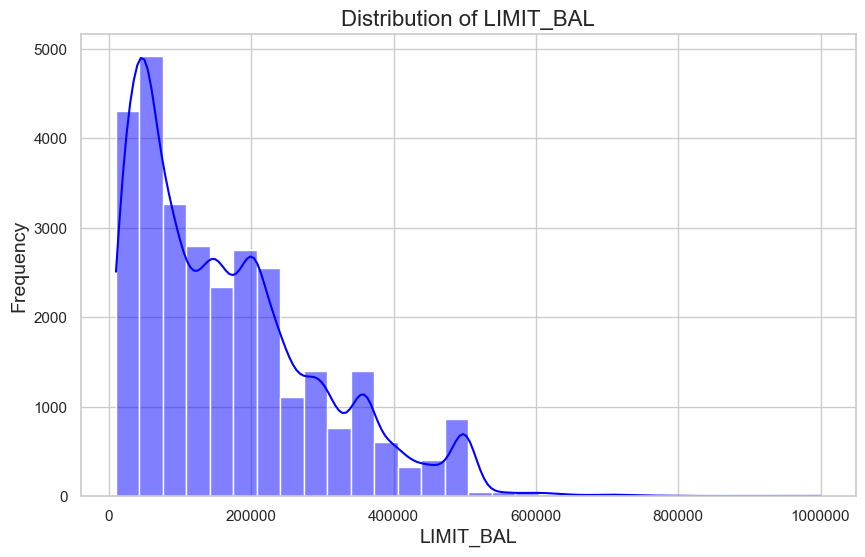

In [17]:
sns.set(style="whitegrid")

# Create the histogram and density plot
plt.figure(figsize=(10, 6))
sns.histplot(df['LIMIT_BAL'], kde=True, color='blue', bins=30)

# Add labels and title
plt.ticklabel_format(style='plain', axis='x') # Disable scientific notation on x-axis
plt.title("Distribution of LIMIT_BAL", fontsize=16)
plt.xlabel("LIMIT_BAL", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()

In [18]:
print("Minimum LIMIT_BAL:", df['LIMIT_BAL'].min())
print("Maximum LIMIT_BAL:", df['LIMIT_BAL'].max())
print("Mean LIMIT_BAL:", df['LIMIT_BAL'].mean())
print("Median LIMIT_BAL:", df['LIMIT_BAL'].median())

Minimum LIMIT_BAL: 10000.0
Maximum LIMIT_BAL: 999999.999999
Mean LIMIT_BAL: 167484.32266666665
Median LIMIT_BAL: 140000.0


In [19]:


# Create bins for LIMIT_BAL
bin_lim = list(range(10000, 1000001, 50000))  # Create bins from 10,000 to 1,000,000 with step of 50,000

# Display bins
print("Bins:", bin_lim)

# Create bin labels (optional for categorization)
bin_labels = [f"{bin_lim[i]}-{bin_lim[i+1]}" for i in range(len(bin_lim) - 1)]

# Assign BIN_LIMIT_BAL column to categorize LIMIT_BAL into bins
df['BIN_LIMIT_BAL'] = pd.cut(df['LIMIT_BAL'], bins=bin_lim, labels=bin_labels, include_lowest=True)

# Display the first few rows of the DataFrame
print(df[['LIMIT_BAL', 'BIN_LIMIT_BAL']].head())


Bins: [10000, 60000, 110000, 160000, 210000, 260000, 310000, 360000, 410000, 460000, 510000, 560000, 610000, 660000, 710000, 760000, 810000, 860000, 910000, 960000]
   LIMIT_BAL  BIN_LIMIT_BAL
0    20000.0    10000-60000
1   120000.0  110000-160000
2    90000.0   60000-110000
3    50000.0    10000-60000
4    50000.0    10000-60000


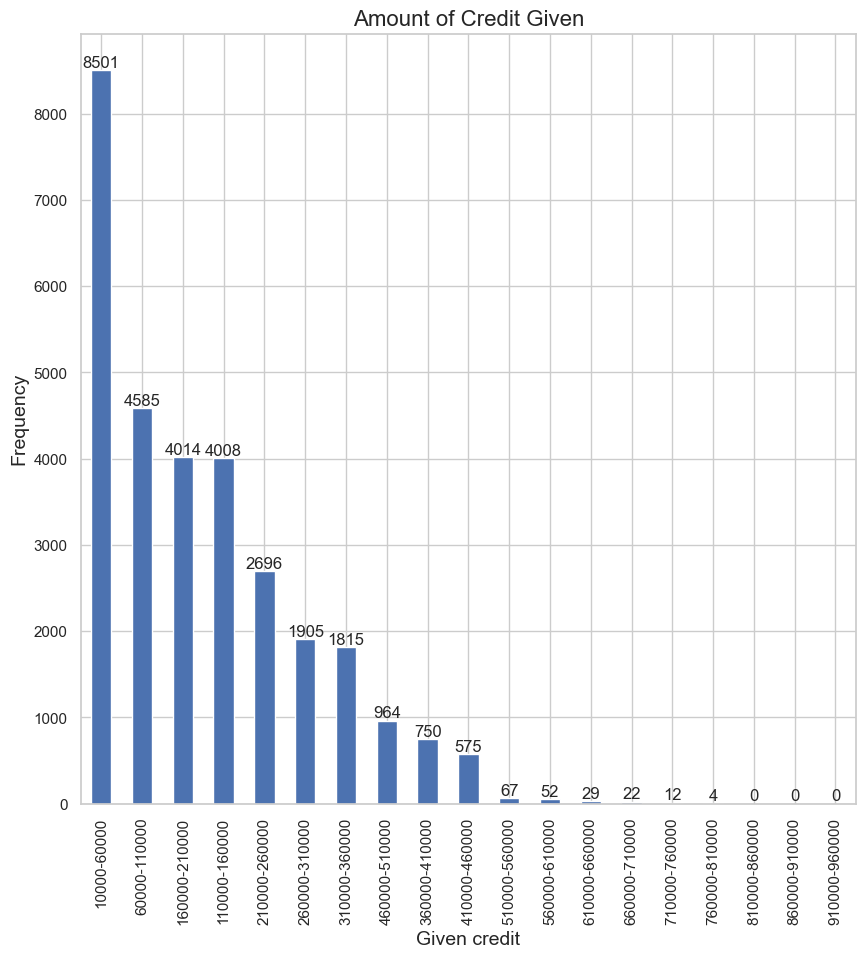

In [20]:
plt.figure(figsize=(10, 10))
ax=(df['BIN_LIMIT_BAL'].value_counts()).plot(kind='bar')
plt.title("Amount of Credit Given", fontsize=16)
plt.xlabel("Given credit", fontsize=14)

plt.ylabel("Frequency", fontsize=14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### BIVARIATE ANALYSIS  (Is limit_bal has any impact on default_payment_next_month?)

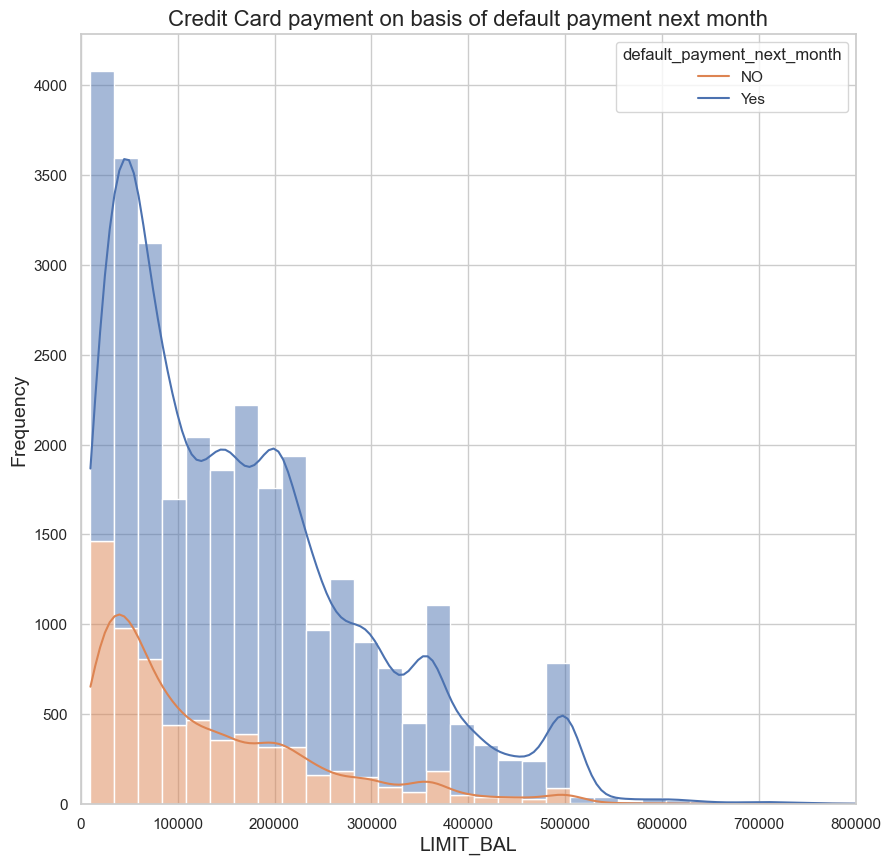

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
sns.histplot(data=df,x='LIMIT_BAL',hue='default_payment_next_month',kde=True,bins=40,multiple='stack')
plt.xlim([0,800000])
plt.legend(title='default_payment_next_month', labels=['NO', 'Yes'])
plt.ticklabel_format(style='plain', axis='x') # Disable scientific notation on x-axis
plt.title("Credit Card payment on basis of default payment next month", fontsize=16)
plt.xlabel("LIMIT_BAL", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

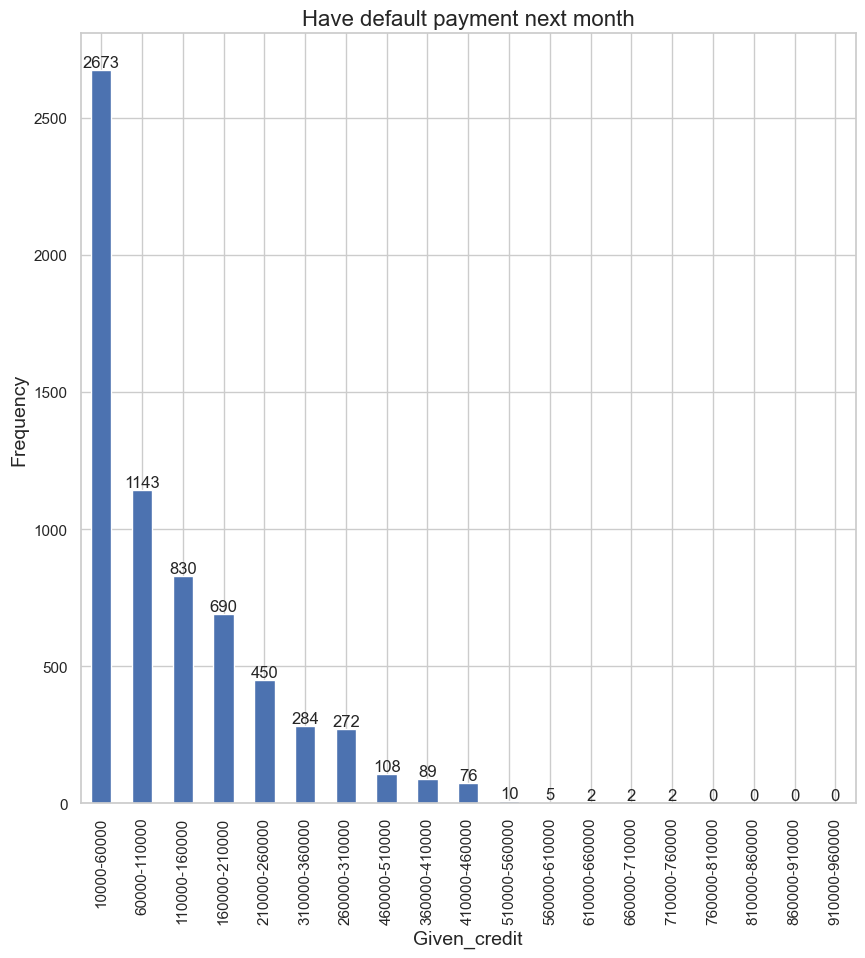

In [22]:
data1 = df.groupby('default_payment_next_month')['BIN_LIMIT_BAL'].value_counts()[1]


sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
#colors = sns.color_palette("hsv", len(data1))
ax3 = data1.plot(kind='bar',stacked=True)
plt.title("Have default payment next month", fontsize=16)
plt.xlabel("Given_credit", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
for bars in ax3.containers:
    ax3.bar_label(bars)
plt.show()


#### Insights
- From the above plot we can see how many credit has been given to credit card hodlers and how many credit card holders have default payment.
- most of Credit card holders have default payment whose Limit is below 1 Lakh

### 5.1.2 SEX COLUMN
SEX: Gender (1=male, 2=female)

- How is distribution of SEX?
- Is limit_bal has any impact on default_payment_next_month?

#### UNIVARIATE ANALYSIS ( How is distribution of SEX? )


In [23]:
sex_labels = {1: 'Male', 2: 'Female'}
sex_counts = df['SEX'].value_counts().rename(index=sex_labels)
sex_counts

SEX
Female    18112
Male      11888
Name: count, dtype: int64

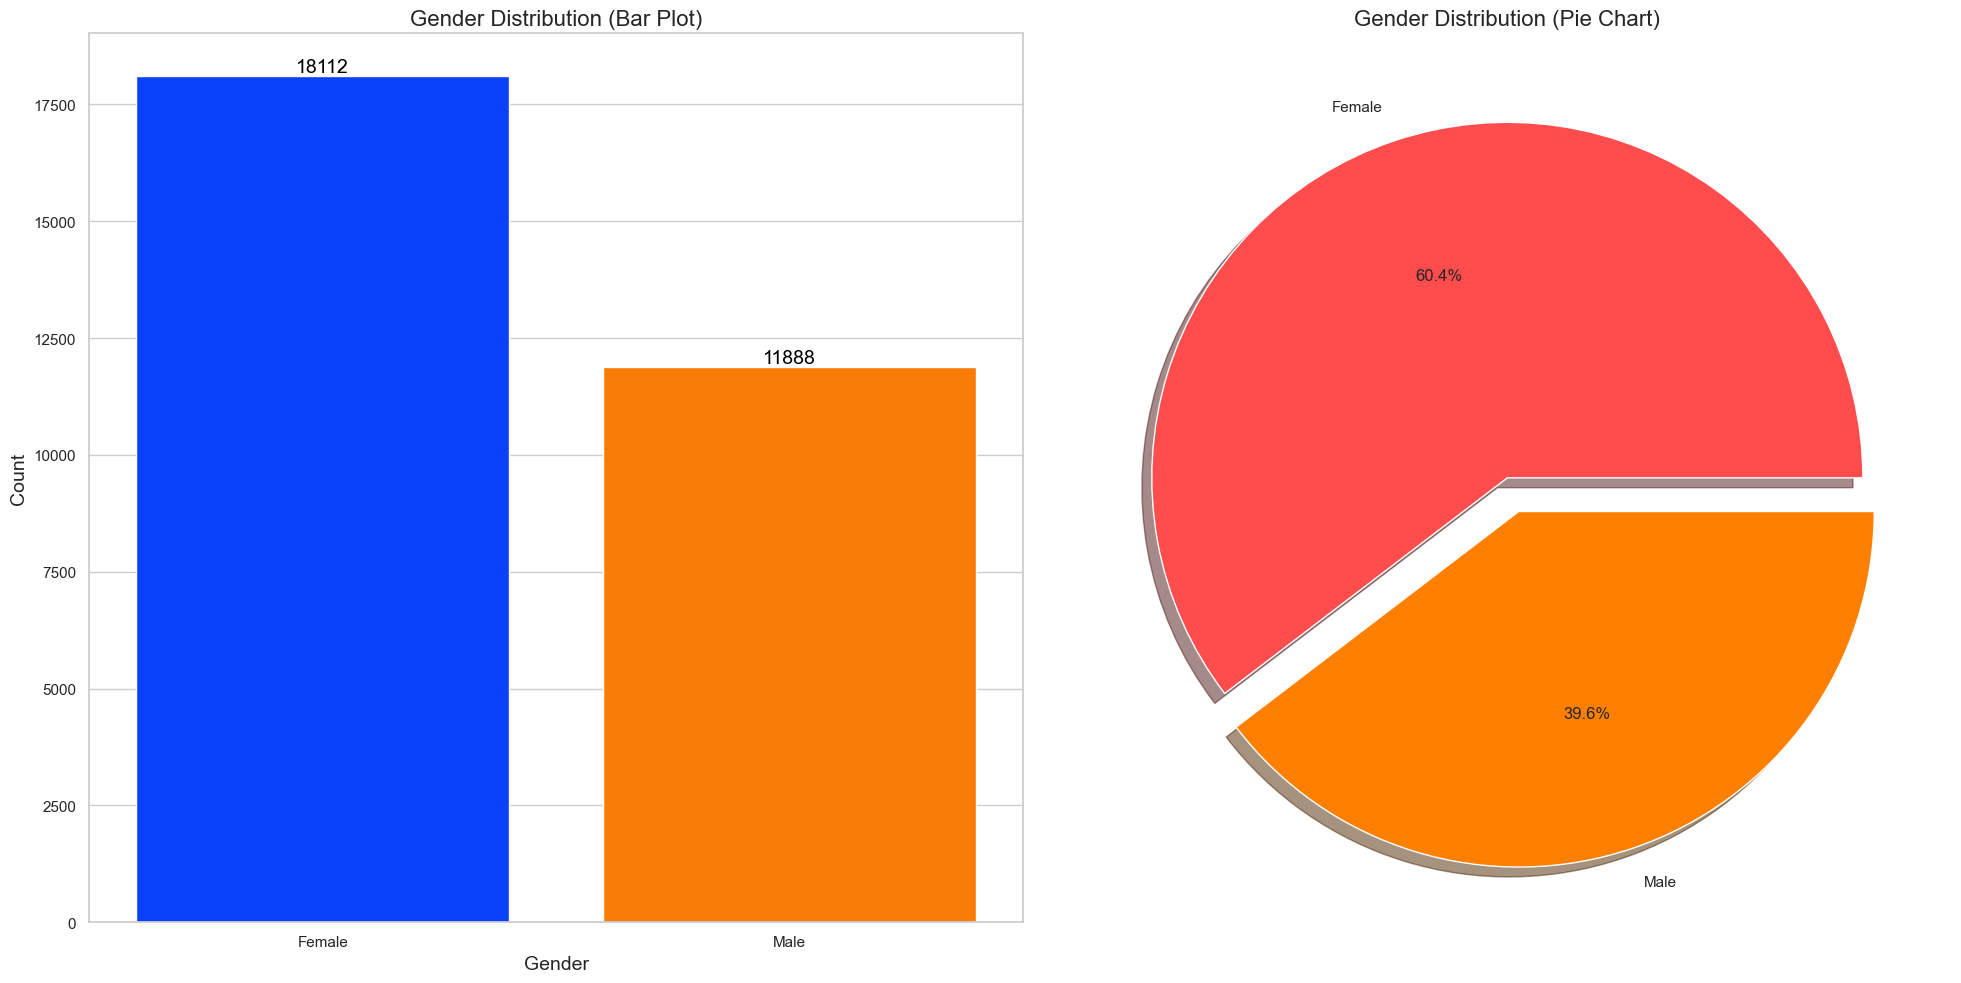

In [24]:
# Compute the value counts with labels for Male and Female
sex_labels = {1: 'Male', 2: 'Female'}
sex_counts = df['SEX'].value_counts().rename(index=sex_labels)

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Bar plot
sns.barplot(x=sex_counts.index, y=sex_counts.values, ax=ax[0], saturation=0.95, palette="bright")
ax[0].set_title("Gender Distribution (Bar Plot)", fontsize=16)
ax[0].set_xlabel("Gender", fontsize=14)
ax[0].set_ylabel("Count", fontsize=14)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

# Pie chart
ax[1].pie(
    x=sex_counts,
    labels=sex_counts.index,
    explode=[0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    colors=['#ff4d4d', '#ff8000']
)
ax[1].set_title("Gender Distribution (Pie Chart)", fontsize=16)

# Show the plots
plt.tight_layout()
plt.show()


#### Insights
- SEX has balanced data with female Credit card holders are 18112 (60.4%) and male credit card holders are 11888 (39.6%)

#### BIVARIATE ANALYSIS (Is Gender has any impact on default_payment_next_month?)

In [25]:
grouped_data = df.groupby('SEX')['default_payment_next_month'].value_counts()
grouped_data


SEX  default_payment_next_month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: count, dtype: int64

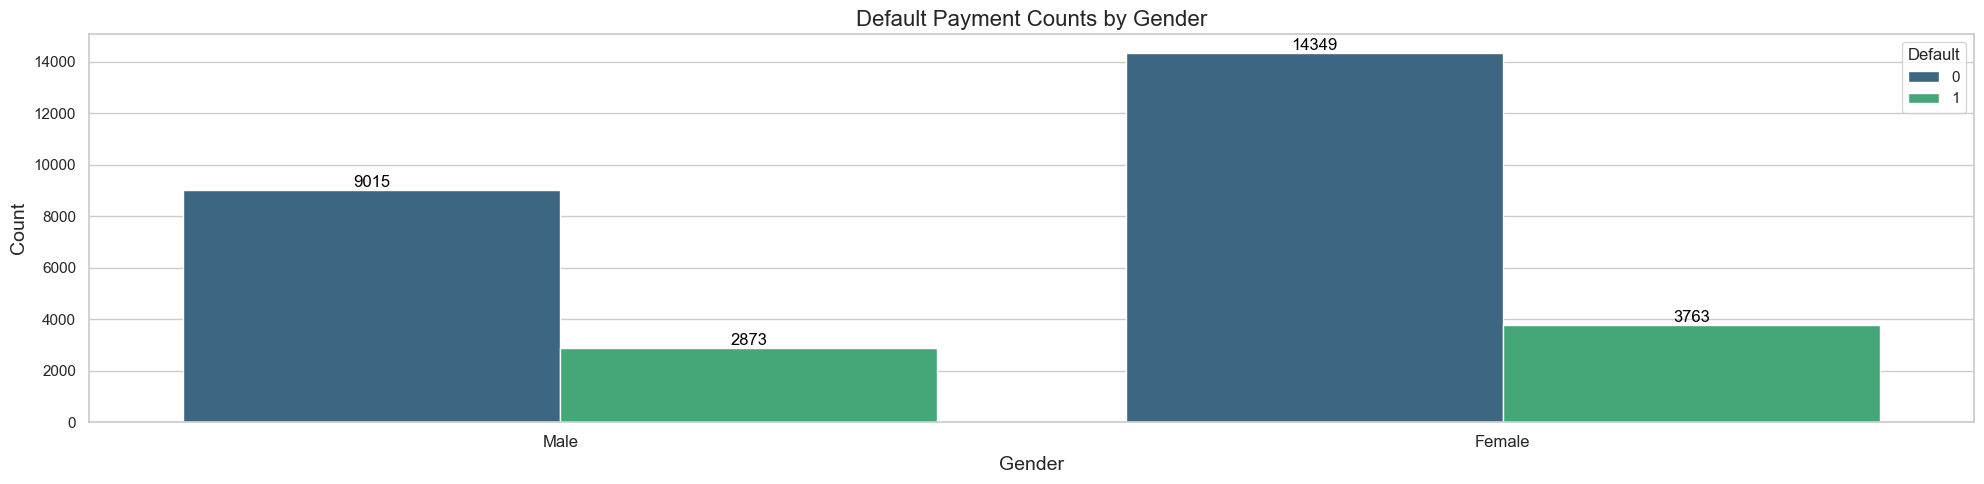

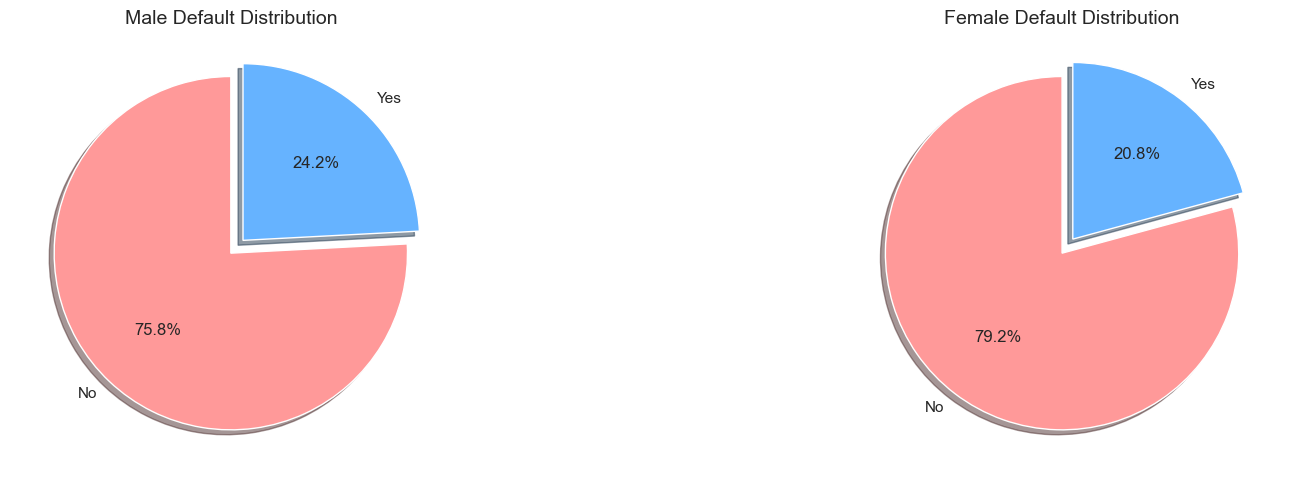

In [26]:
grouped_data = df.groupby('SEX')['default_payment_next_month'].value_counts()
# Reset index and rename columns
grouped_data = grouped_data.reset_index()
grouped_data.columns = ['SEX', 'Default', 'Count']  # Renaming columns explicitly


def create_bar_chart(grouped_data,w,h):

  # Create a figure with subplots (2 subplots)
  f, ax = plt.subplots(1, 1, figsize=(w, h))

  # Bar plot
  sns.barplot(data=grouped_data, x='SEX', y='Count', hue='Default', palette='viridis')
  ax.set_title('Default Payment Counts by Gender', fontsize=16)
  ax.set_xlabel('Gender', fontsize=14)
  ax.set_ylabel('Count', fontsize=14)
  ax.set_xticklabels(['Male', 'Female'],fontsize=12)

  # Add bar labels
  for container in ax.containers:
      ax.bar_label(container, color='black', size=12)
  # Adjust layout and show
  plt.tight_layout()
  plt.show()


def create_pie_chart(grouped_data, w, h):
    # Create a 1x2 grid of subplots (1 row, 2 columns) with specified figure size
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(w, h))

    # Aggregating counts for pie chart
    pie_data = grouped_data.groupby(['SEX', 'Default'])['Count'].sum().reset_index()

    # Creating pie charts for each gender (Male and Female)
    for i, gender in enumerate(pie_data['SEX'].unique()):
        # Filter data for the specific gender
        gender_data = pie_data[pie_data['SEX'] == gender]

        # Plotting the pie chart on the correct axis (ax1 for Male and ax2 for Female)
        if gender == 1:  # For Male
            ax = ax1
            gender_label = 'Male'
        else:  # For Female
            ax = ax2
            gender_label = 'Female'

        ax.pie(
            gender_data['Count'],
            labels=gender_data['Default'].replace({0: 'No', 1: 'Yes'}),
            autopct='%1.1f%%',
            startangle=90,
            colors=['#ff9999', '#66b3ff'],
            explode=[0, 0.1],  # Slightly explode the "Yes" slice
            shadow=True,
        )
        ax.set_title(f'{gender_label} Default Distribution', fontsize=14)

    # Adjust layout for better spacing between the plots
    plt.tight_layout()

    # Display the pie charts
    plt.show()



create_bar_chart(grouped_data,20,5)
create_pie_chart(grouped_data,20,5)


#### Insights
- From this plot we can  about 3763 (20.8 %) female credit card holders and about 2873 (24.2 %) male credit card holders have default payments

### 5.1.3 EDUCATION
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown)
- How is distribution of EDUCATION?
- Is education has any impact on default_payment_next_month?

#### UNIVARIATE ANALYSIS (How is distribution of EDUCATION?)

In [27]:
df['EDUCATION'].value_counts()

EDUCATION
2    14095
1    10585
3     4917
5      280
4      123
Name: count, dtype: int64

In [28]:
edu_data = df['EDUCATION'].value_counts().rename({1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others', 5: 'unknown'})
edu_data

EDUCATION
university         14095
graduate school    10585
high school         4917
unknown              280
others               123
Name: count, dtype: int64

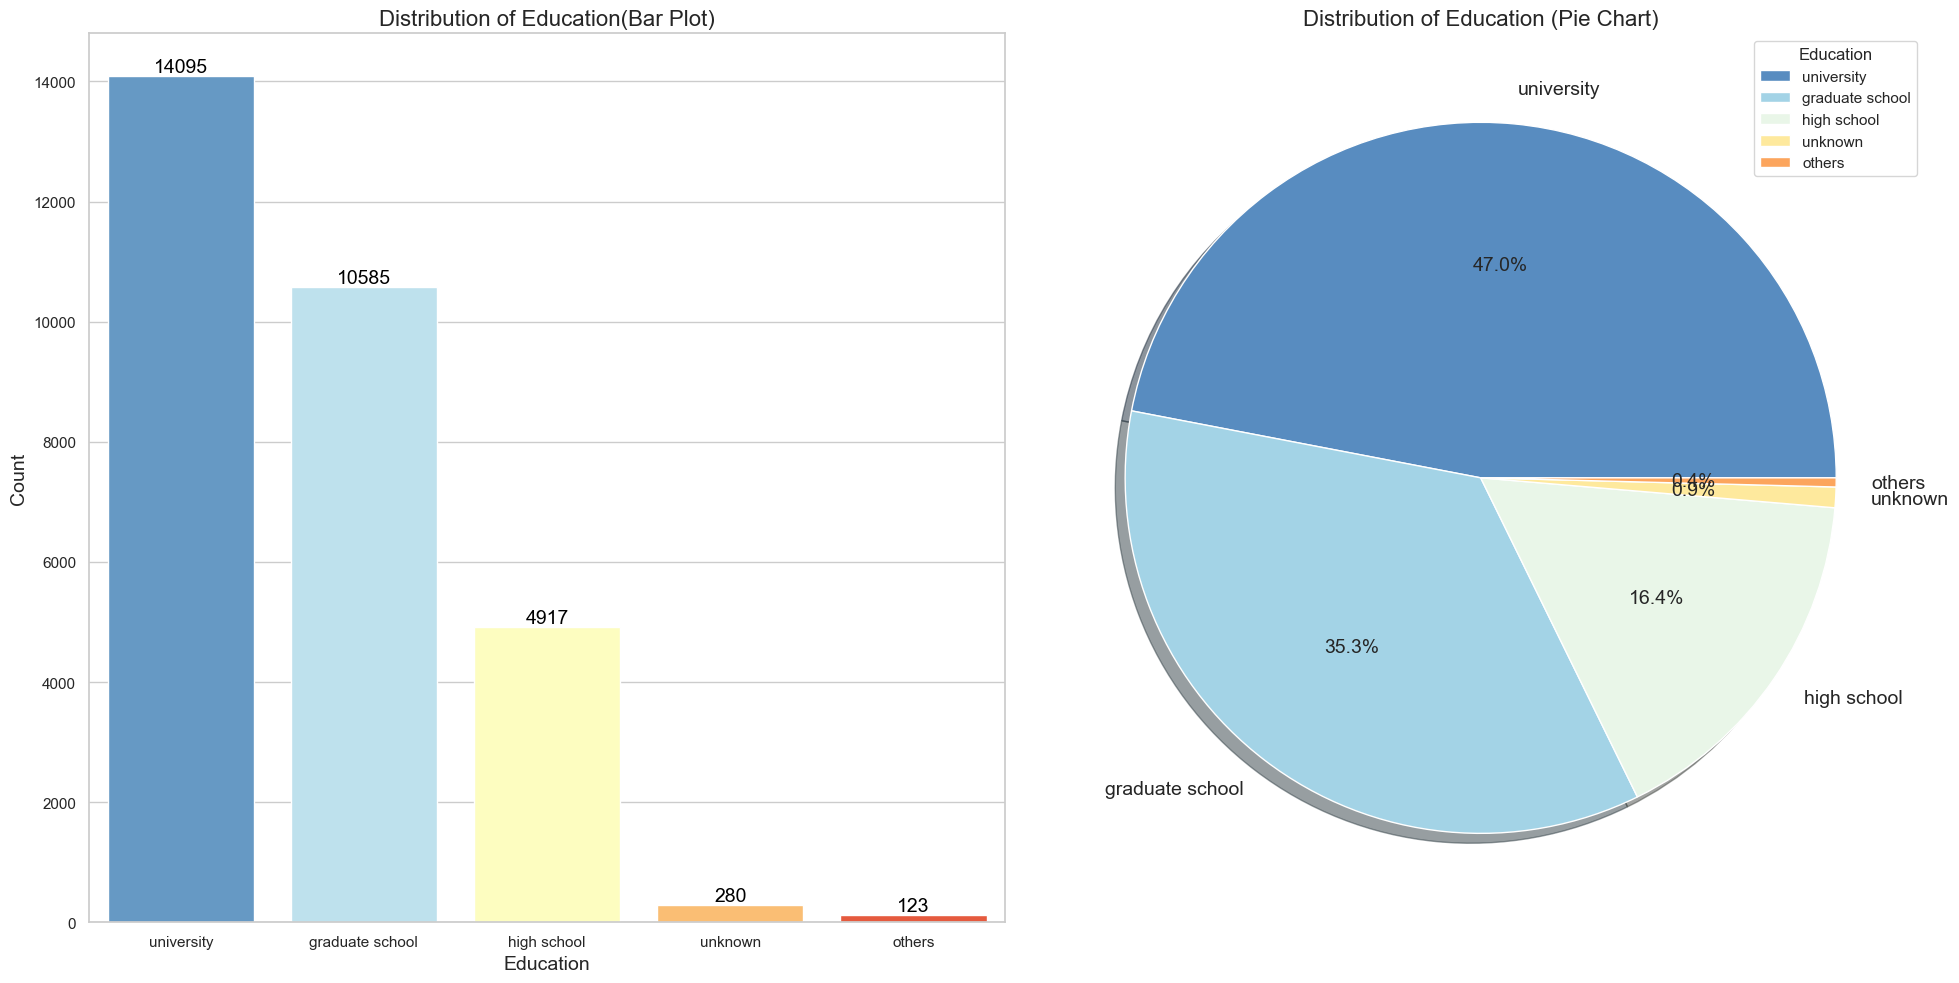

In [29]:


# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Bar plot
sns.barplot(x=edu_data.index, y=edu_data.values, ax=ax[0], saturation=0.95, palette="RdYlBu_r")
ax[0].set_title("Distribution of Education(Bar Plot)", fontsize=16)
ax[0].set_xlabel("Education", fontsize=14)
ax[0].set_ylabel("Count", fontsize=14)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

# Pie chart
#explode = [0.1] * len(edu_data)  # Dynamically setting explode for all slices
#colors = ['#ff4d4d', '#ff8000', '#ffd11a', '#80b3ff', '#99ff99']  # Enough colors for all slices
palette_color = sns.color_palette('RdYlBu_r')
ax[1].pie(
    x=edu_data,
    labels=edu_data.index,
    #explode=explode,
    autopct='%1.1f%%',
    shadow=True,
    colors=palette_color,
    textprops={'fontsize': 14}
)
ax[1].set_title("Distribution of Education (Pie Chart)", fontsize=16)
ax[1].legend(title='Education', loc='upper right', labels=edu_data.index)

# Show the plots
plt.tight_layout()
plt.show()

#### Insight
- most of the credit card holders are from university and schools

#### BIVARIATE ANALYSIS (Is education has any impact on default_payment_next_month?)

In [30]:
Data2 = df.groupby('EDUCATION')['default_payment_next_month'].value_counts()
Data2

EDUCATION  default_payment_next_month
1          0                              8549
           1                              2036
2          0                             10757
           1                              3338
3          0                              3680
           1                              1237
4          0                               116
           1                                 7
5          0                               262
           1                                18
Name: count, dtype: int64

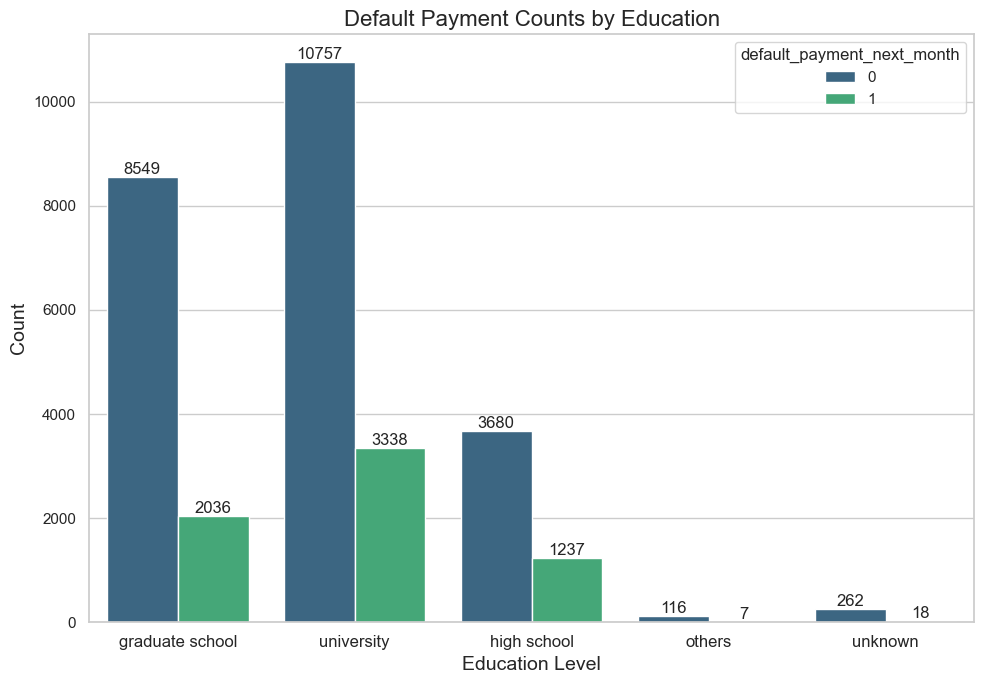

In [31]:
Data2 = df.groupby('EDUCATION')['default_payment_next_month'].value_counts().reset_index(name='Count')

# Function to create bar chart
def creating_bar_chart(data, w, h):
    # Create a figure and axis
    plt.figure(figsize=(w, h))

    # Bar plot
    ax=sns.barplot(data=data, x='EDUCATION', y='Count', hue='default_payment_next_month', palette='viridis',ci=None)

    # Set titles and labels
    plt.title('Default Payment Counts by Education', fontsize=16)
    plt.xlabel('Education Level', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(
        ticks=range(len(data['EDUCATION'].unique())),
        labels=['graduate school', 'university', 'high school', 'others', 'unknown'],
        fontsize=12,
    )
    for bars in ax.containers:
        ax.bar_label(bars)

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

# Call the function
creating_bar_chart(Data2, 10, 7)

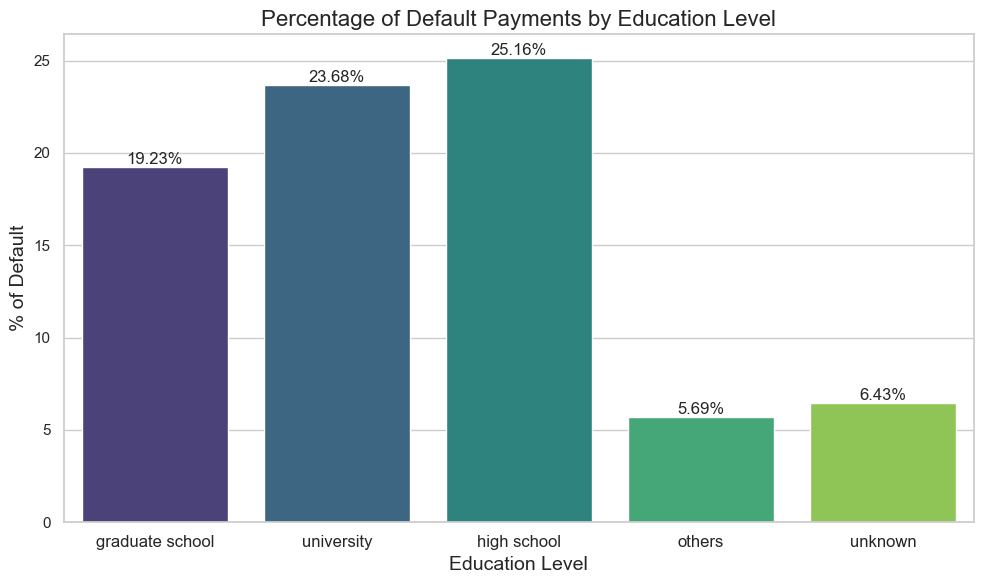

In [32]:
filtered_df = df[df['default_payment_next_month'] == 1]

# Group by 'EDUCATION' and calculate the percentage of defaults
edu_counts = df['EDUCATION'].value_counts()
default_counts = filtered_df['EDUCATION'].value_counts()
percentage_defaults = (default_counts / edu_counts * 100).reset_index()

# Rename columns for clarity
percentage_defaults.columns = ['EDUCATION', '% of Default']

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(data=percentage_defaults, x='EDUCATION', y='% of Default', palette='viridis', ci=None)
plt.title('Percentage of Default Payments by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('% of Default', fontsize=14)
plt.xticks(
        ticks=range(len(percentage_defaults['EDUCATION'].unique())),
        labels=['graduate school', 'university', 'high school', 'others', 'unknown'],
        fontsize=12,
    )
# Add annotations to the bars
for p in ax3.patches:
    ax3.annotate(
        f"{p.get_height():.2f}%",  # Format the height as a percentage
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position above the bar
        ha='center', va='bottom', fontsize=12
    )

plt.tight_layout()
plt.show()


#### Insights
- On the basis of Education High school defaulters are high followed by University and Graduate school

### 5.1.4 MARRIAGE
MARRIAGE: Marital status (1=married, 2=single, 3=others)
- How is distribution of MARRIAGE?
- Is MARRIAGE has any impact on default_payment_next_month?

#### UNIVARIATE ANALYSIS (How is distribution of MARRIAGE?)

In [33]:
mar_data = df['MARRIAGE'].value_counts().rename({1: 'married', 2: 'single', 3: 'others'})
mar_data

MARRIAGE
single     16018
married    13659
others       323
Name: count, dtype: int64

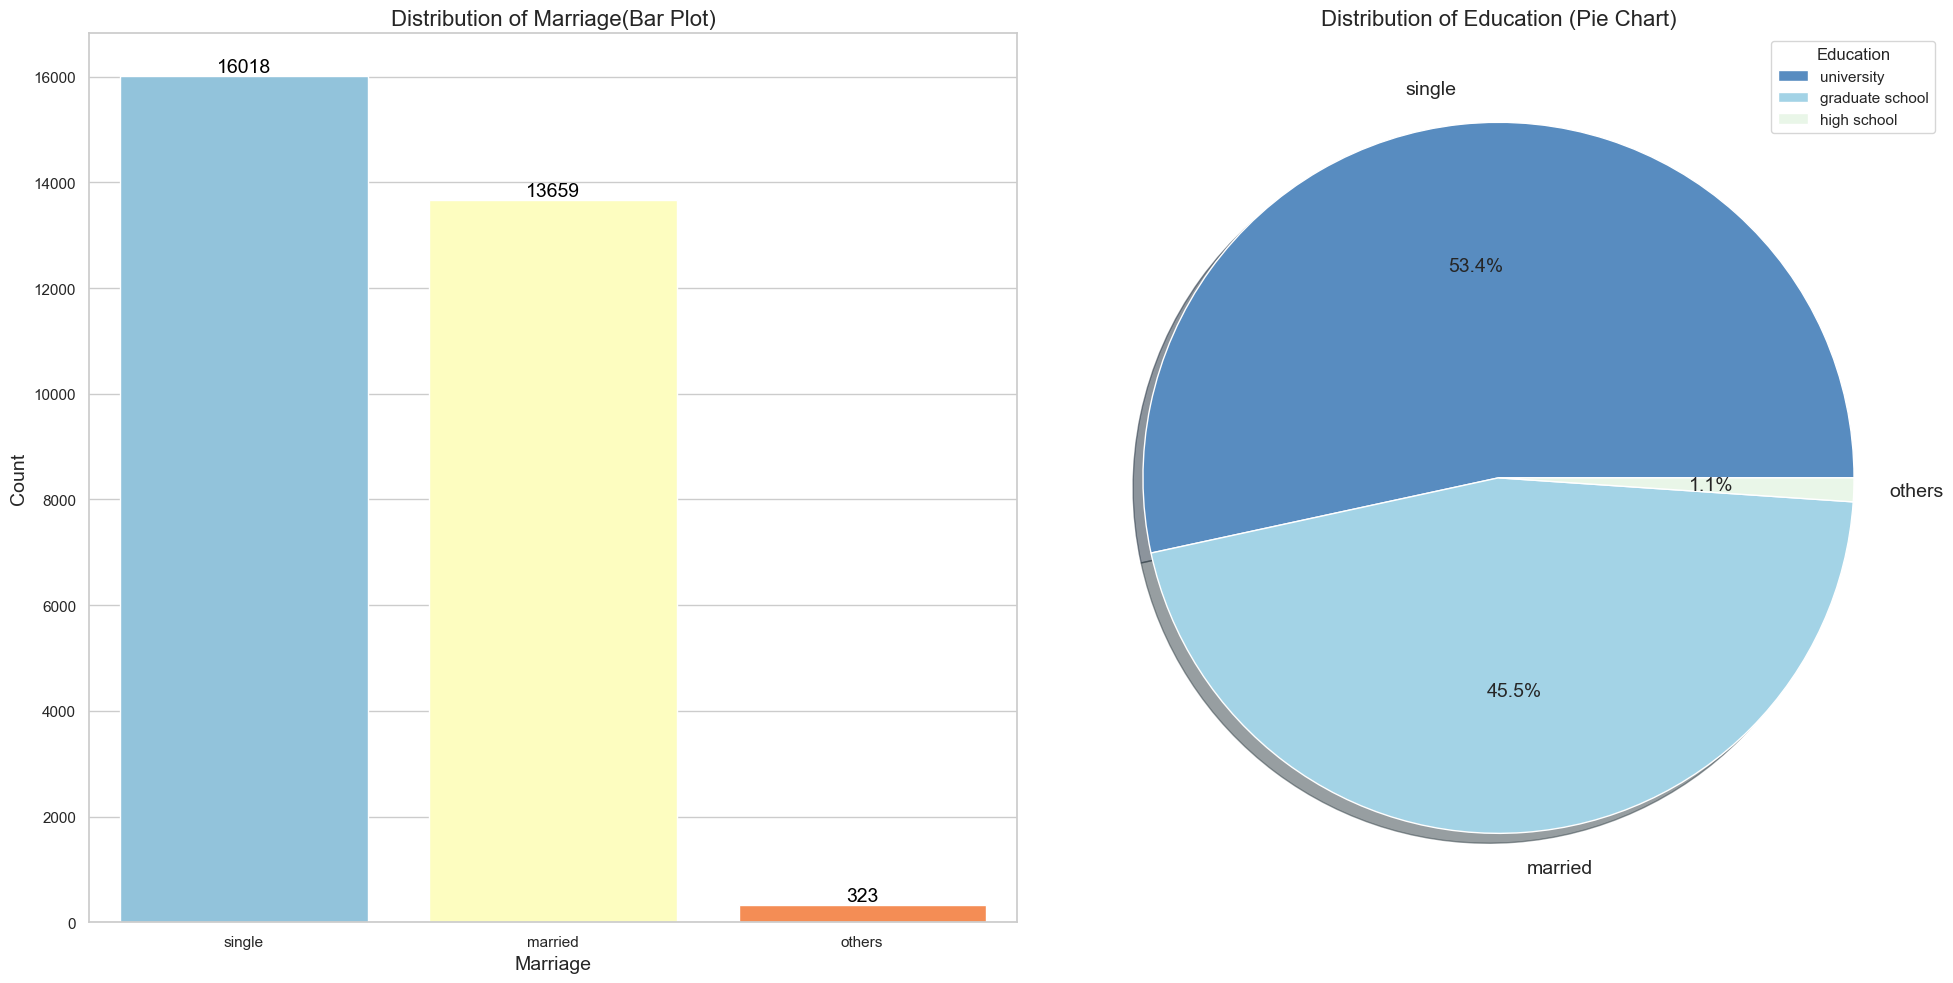

In [34]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Bar plot
sns.barplot(x=mar_data.index, y=mar_data.values, ax=ax[0], saturation=0.95, palette="RdYlBu_r")
ax[0].set_title("Distribution of Marriage(Bar Plot)", fontsize=16)
ax[0].set_xlabel("Marriage", fontsize=14)
ax[0].set_ylabel("Count", fontsize=14)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

# Pie chart
#explode = [0.1] * len(edu_data)  # Dynamically setting explode for all slices
#colors = ['#ff4d4d', '#ff8000', '#ffd11a', '#80b3ff', '#99ff99']  # Enough colors for all slices
palette_color = sns.color_palette('RdYlBu_r')
ax[1].pie(
    x=mar_data,
    labels=mar_data.index,
    #explode=explode,
    autopct='%1.1f%%',
    shadow=True,
    colors=palette_color,
    textprops={'fontsize': 14}
)
ax[1].set_title("Distribution of Education (Pie Chart)", fontsize=16)
ax[1].legend(title='Education', loc='upper right', labels=edu_data.index)

# Show the plots
plt.tight_layout()
plt.show()

#### BIVARIATE ANALYSIS (Is MARRIAGE has any impact on default_payment_next_month?)

In [35]:
data4= df.groupby('MARRIAGE')['default_payment_next_month'].value_counts()
data4

MARRIAGE  default_payment_next_month
1         0                             10453
          1                              3206
2         0                             12672
          1                              3346
3         0                               239
          1                                84
Name: count, dtype: int64

In [36]:
data4 = df.groupby('MARRIAGE')['default_payment_next_month'].value_counts().reset_index(name='Count')
data4['MARRIAGE'] = data4['MARRIAGE'].replace({1: 'Married', 2: 'Single', 3: 'Others'})
data4['default_payment_next_month'] = data4['default_payment_next_month'].replace({0: 'No', 1: 'Yes'})

# Display the updated DataFrame
print(data4)

  MARRIAGE default_payment_next_month  Count
0  Married                         No  10453
1  Married                        Yes   3206
2   Single                         No  12672
3   Single                        Yes   3346
4   Others                         No    239
5   Others                        Yes     84


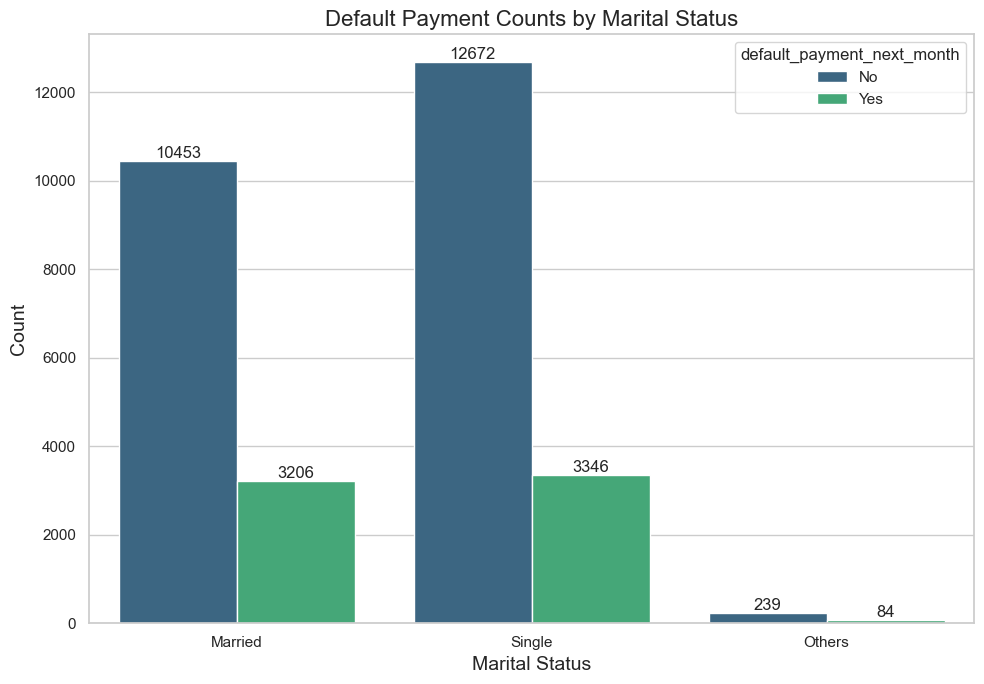

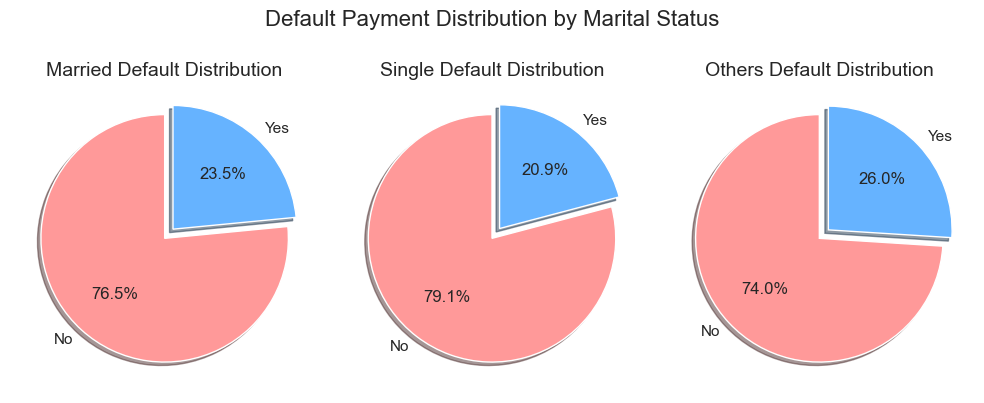

In [37]:
def MAR_bar_chart(data,w,h):
    f, ax = plt.subplots(1, 1, figsize=(w, h))
    sns.barplot(data=data4, x='MARRIAGE', y='Count', hue='default_payment_next_month', palette='viridis')
    ax.set_title('Default Payment Counts by Marital Status', fontsize=16)
    ax.set_xlabel('Marital Status', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    #plt.legend(title='Default Payment', labels=['No', 'Yes'], fontsize=12)
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.tight_layout()
    plt.show()

def MAR_pie_chart(data, w, h):
    # Set up the figure with 3 subplots for pie charts
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(w, h))

    # Grouping and preparing data
    pie_data = data.groupby(['MARRIAGE', 'default_payment_next_month'])['Count'].sum().reset_index()
    pie_data['MARRIAGE'] = pie_data['MARRIAGE'].replace({1: 'Married', 2: 'Single', 3: 'Others'})
    pie_data['default_payment_next_month'] = pie_data['default_payment_next_month'].replace({0: 'No', 1: 'Yes'})

    # Mapping subplots to marital statuses
    axes = {'Married': ax1, 'Single': ax2, 'Others': ax3}

    for marital_status in pie_data['MARRIAGE'].unique():
        marital_data = pie_data[pie_data['MARRIAGE'] == marital_status]
        ax = axes[marital_status]

        ax.pie(
            marital_data['Count'],
            labels=marital_data['default_payment_next_month'],
            autopct='%1.1f%%',
            startangle=90,
            colors=['#ff9999', '#66b3ff'],  # Custom colors for "No" and "Yes"
            explode=[0, 0.1],  # Slightly explode the "Yes" slice
            shadow=True
        )
        ax.set_title(f'{marital_status} Default Distribution', fontsize=14)

    # Adjust layout and display
    plt.suptitle('Default Payment Distribution by Marital Status', fontsize=16, y=0.8)
    plt.tight_layout()
    plt.show()


MAR_bar_chart(data4,10,7)
MAR_pie_chart(data4,10,7)

#### Insights
- about 3206 (23.5 %) Married credit holders have defaults payments
- about 3346 (20.9 %) Single credit holders have defaults payments
- about 84 (26 %) others credit holders have defaults payments

### 5.1.5 AGE
AGE: Age in years
- How is distribution of AGE?
- Is AGE has any impact on default_payment_next_month?

#### UNIVARIATE ANALYSIS (How is distribution of AGE?)

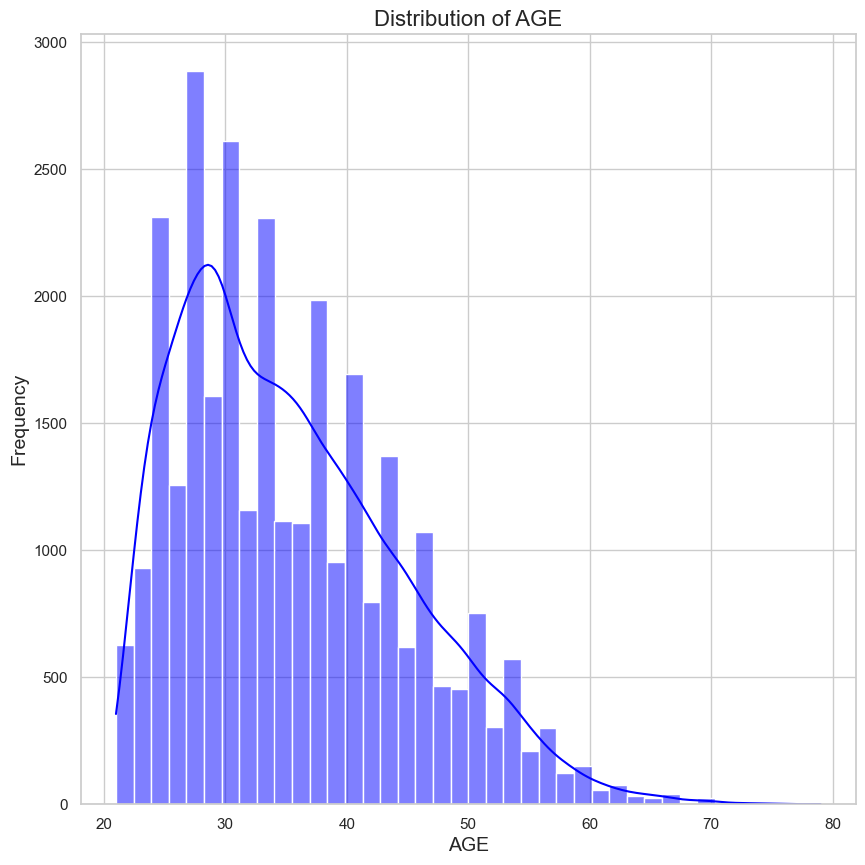

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
sns.histplot(data=df,x='AGE',kde=True,bins=40,color='blue')
# Add labels and title
plt.ticklabel_format(style='plain', axis='x') # Disable scientific notation on x-axis
plt.title("Distribution of AGE", fontsize=16)
plt.xlabel("AGE", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()

#### BIVARIATE ANALYSIS ( Is AGE has any impact on default_payment_next_month? )

In [39]:
print(df['AGE'].min())
print(df['AGE'].max())

21
79


In [40]:
df['bin_age'] = pd.cut(df['AGE'],[15, 20,25, 30, 35, 40, 50, 60, 80])
print(df['bin_age'].value_counts())

bin_age
(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
(15, 20]       0
Name: count, dtype: int64


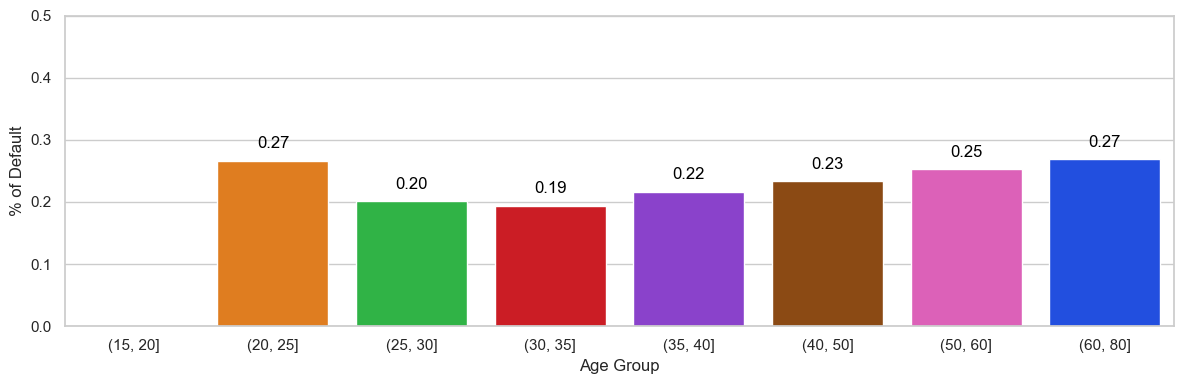

In [41]:
plt.figure(figsize=(12, 4))

# Create a custom bright color palette
colors = sns.color_palette("bright", n_colors=df["bin_age"].nunique())

# Bar plot with custom colors
ax = sns.barplot(
    x=df["bin_age"],
    y=(df["default_payment_next_month"] == 1),
    ci=None,
    palette=colors
)

# Set labels and limits
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("% of Default", fontsize=12)
plt.ylim(0, 0.5)

# Annotate each bar with its height
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2, p.get_height() + 0.02),
        ha="center",
        fontsize=12,
        color="black"
    )

# Show the plot
plt.tight_layout()
plt.show()


#### Insights
- Age Group of 30 to 35 has lowest number of Credit Card payment Defaulters followed by Age Group of 25 to 30 and 35 to 40 .

- Age Group of 20 to 25 and 60 to 80 has highest number of credit card payment defaulters followed by Age Group of 50 to 60 and 40 to 50 .

### 5.1.6 Repayment status
[ PAY_1: Repayment status in September, 2005 (-2= no credit to pay , -1=pay duly , 0= minimum payment is met , 1=payment delay for one month , 2=payment delay for two months , … 8=payment delay for eight months , 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above) ]

- How is distribution of Repayment status?
- Is Repayment status has any impact on default_payment_next_month?

#### UNIVARIATE ANALYSIS ( How is distribution of Repayment status? )

In [42]:
pay_data = df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].value_counts()
pay_data

PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
 0      0      0      0      0      0       9821
-2     -2     -2     -2     -2     -2       2109
-1     -1     -1     -1     -1     -1       1992
 1     -2     -2     -2     -2     -2        651
 2      2      2      2      2      2        530
                                            ... 
       -1      2      2      2      0          1
                            -1      0          1
                            -2     -1          1
                                   -2          1
 1     -1      2      2      2     -1          1
Name: count, Length: 1106, dtype: int64

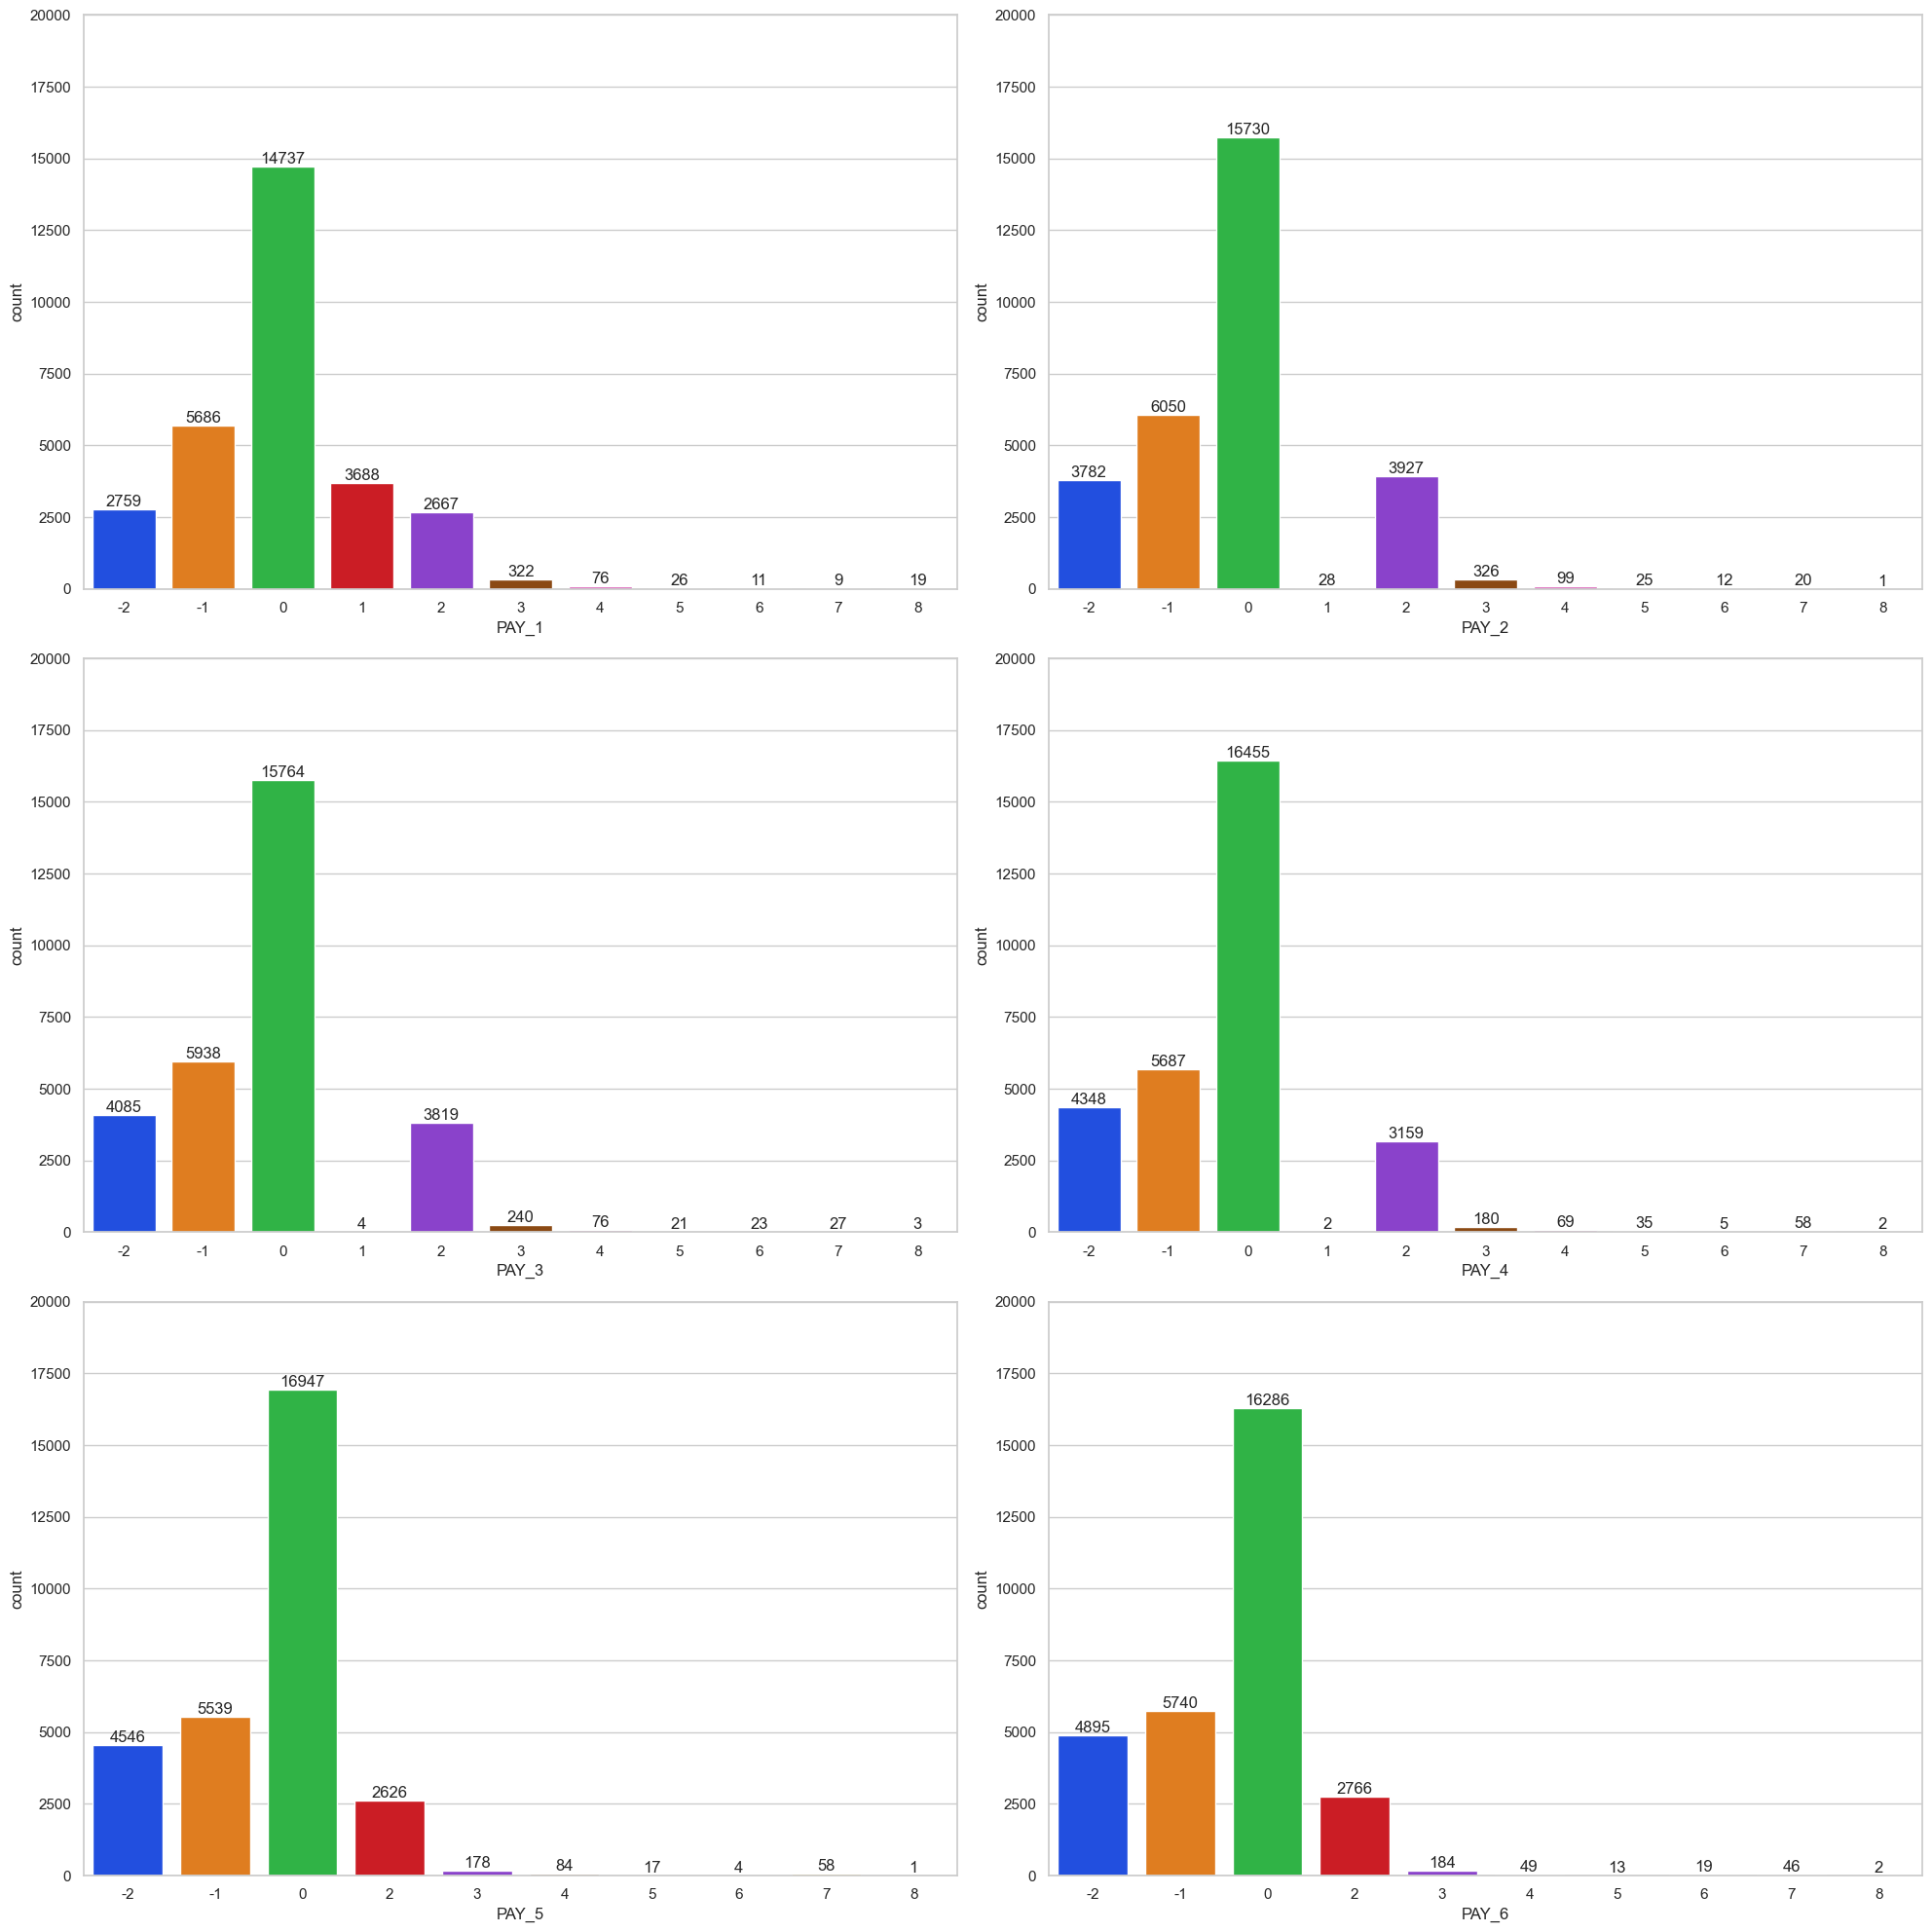

In [43]:
pay_col=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
plt.figure(figsize=(20,20))

for i,features in enumerate(pay_col,start=1):
  plt.subplot(3,2,i)
  ax=sns.countplot(data=df,x=features,palette='bright')
  plt.ylim(0,20000)
  for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()

#### BIVARIATE ANALYSIS ( Is Repayment status has any impact on default_payment_next_month? )

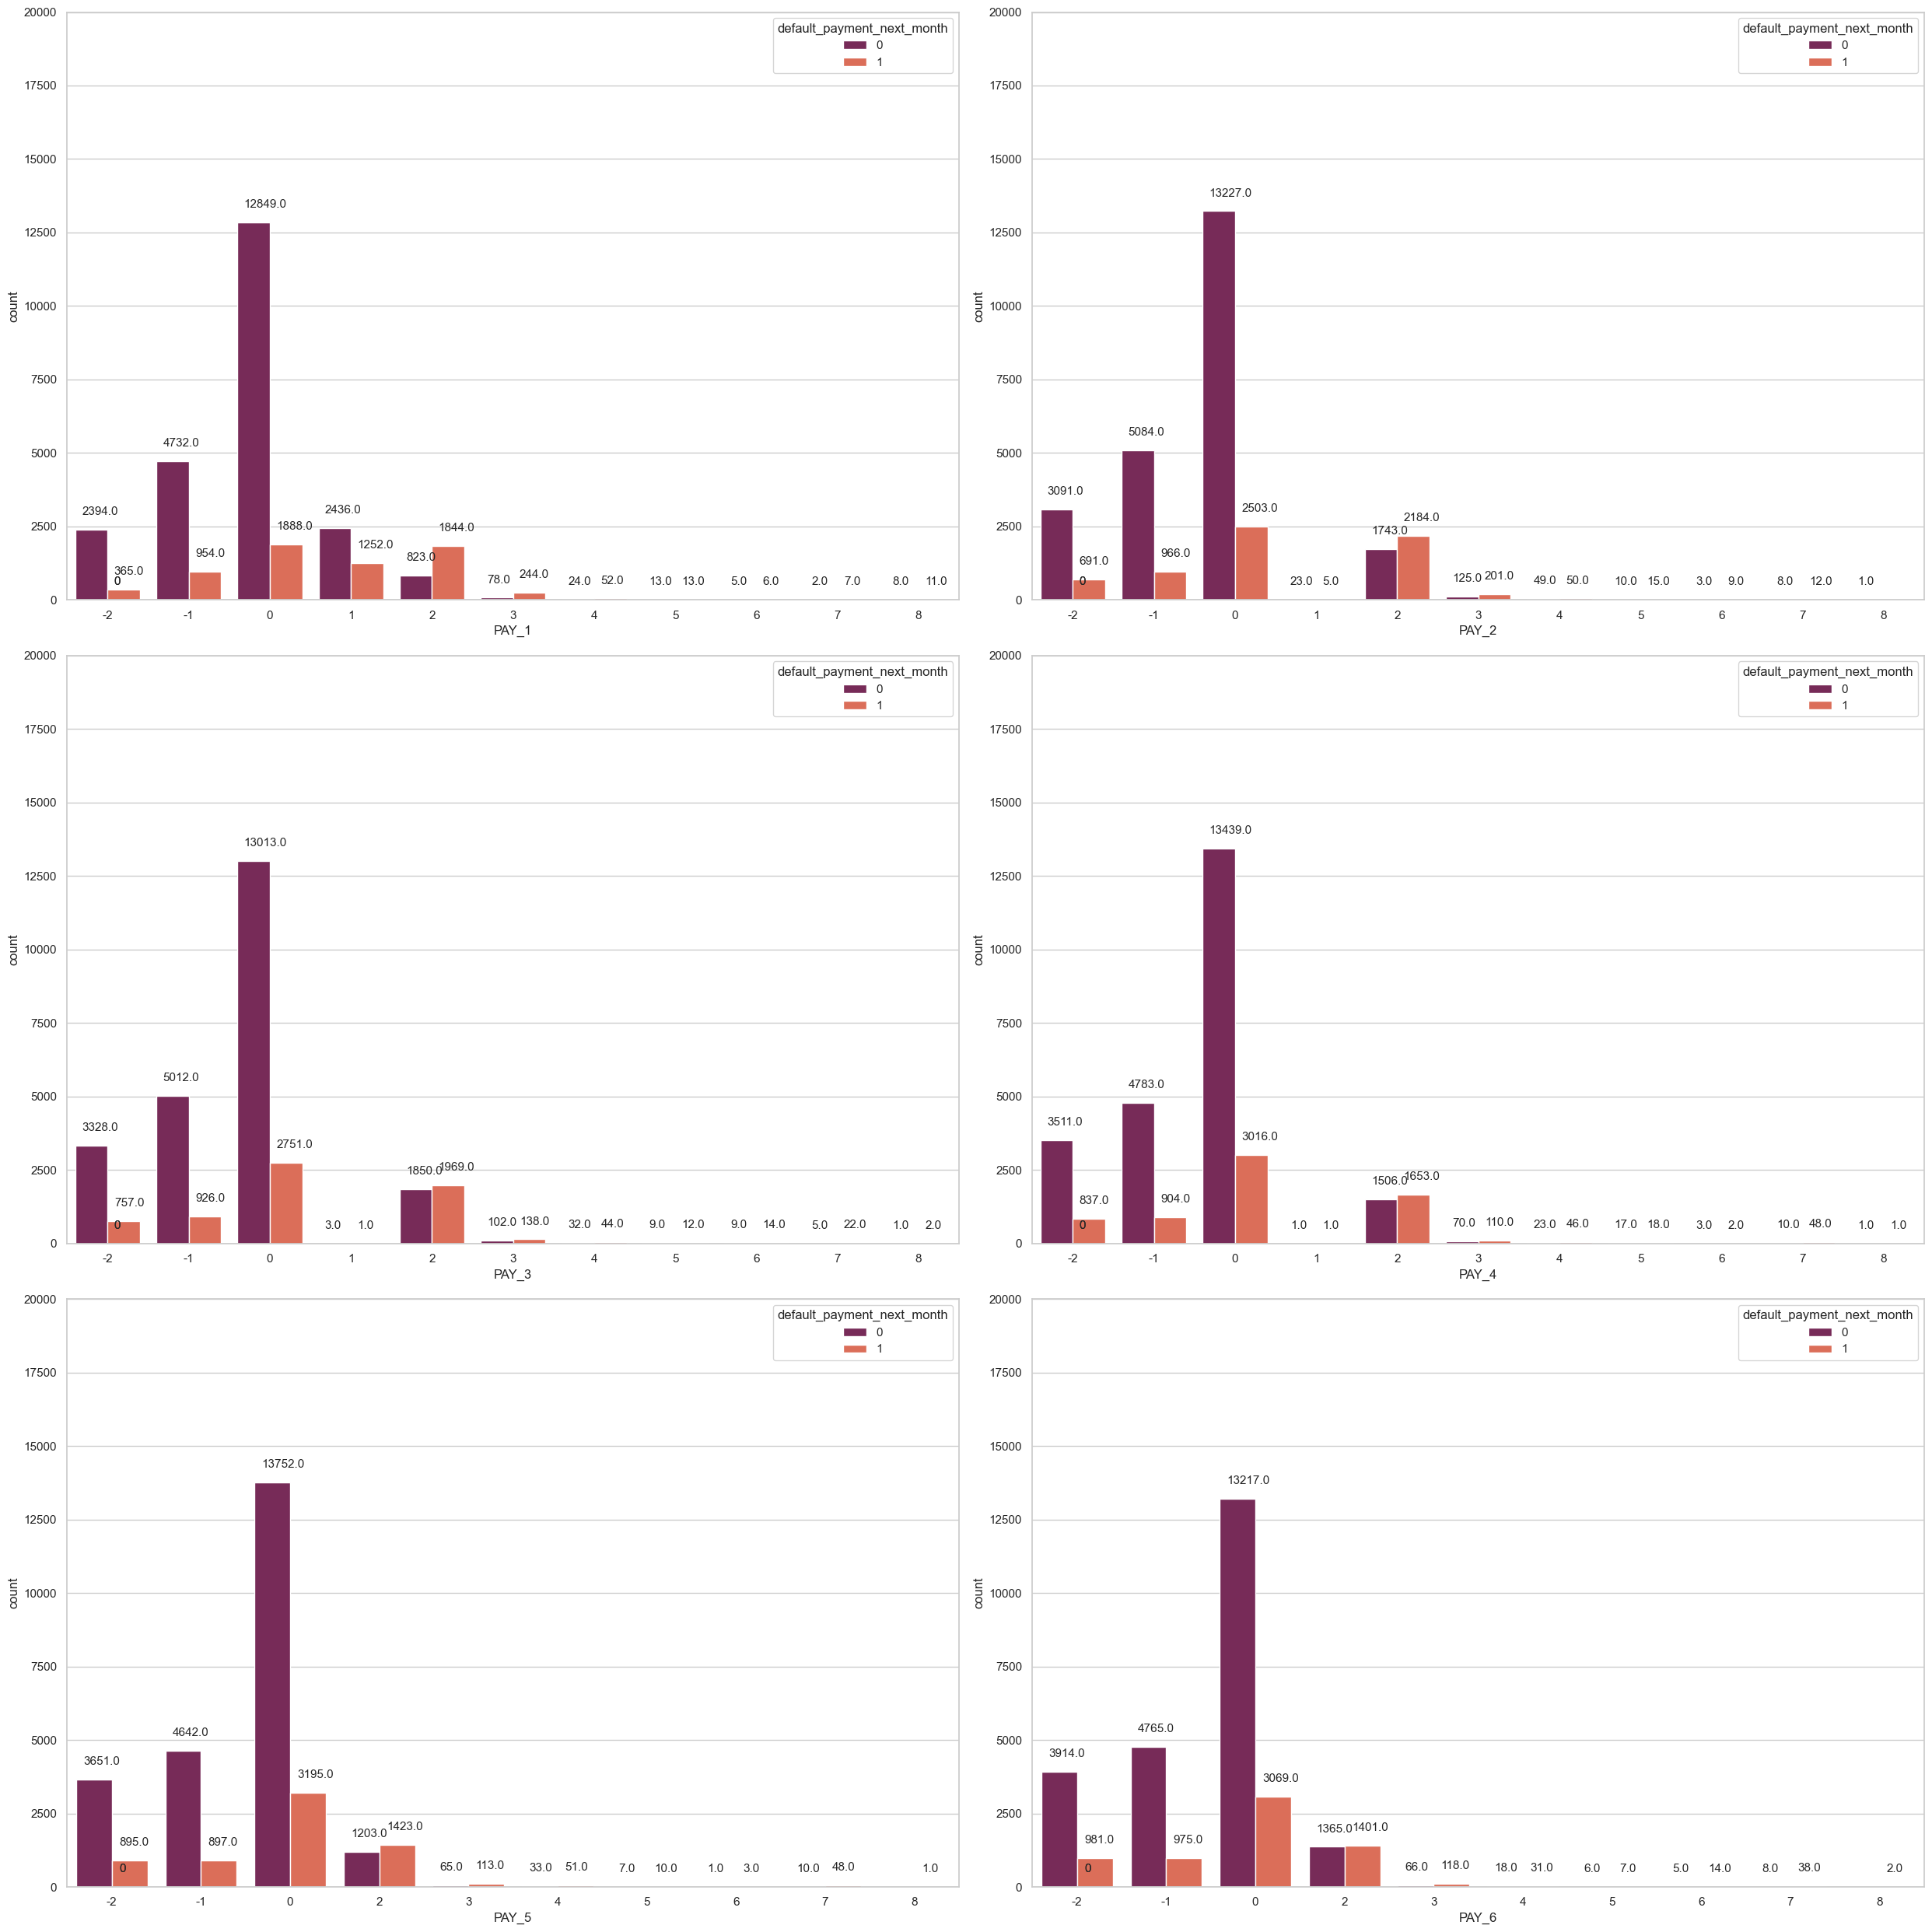

In [44]:
pay_col1=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
plt.figure(figsize=(25,25))

for i,features in enumerate(pay_col1,start=1):
  plt.subplot(3,2,i)
  ax=sns.countplot(data=df,x=features,hue='default_payment_next_month',palette='rocket')
  plt.ylim(0,20000)
  plt.tight_layout()
  for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.tight_layout()
plt.show()

#### Insights
- From above we can conclude that majority of customers are paying minimum amount due .

### 5.1.7 default_payment_next_month
Default payment (1=yes, 0=no)

- How is distribution of Default payment?

In [45]:
default_data = df['default_payment_next_month'].value_counts()
default_data.rename({0: 'No', 1: 'Yes'}, inplace=True)
default_data

default_payment_next_month
No     23364
Yes     6636
Name: count, dtype: int64

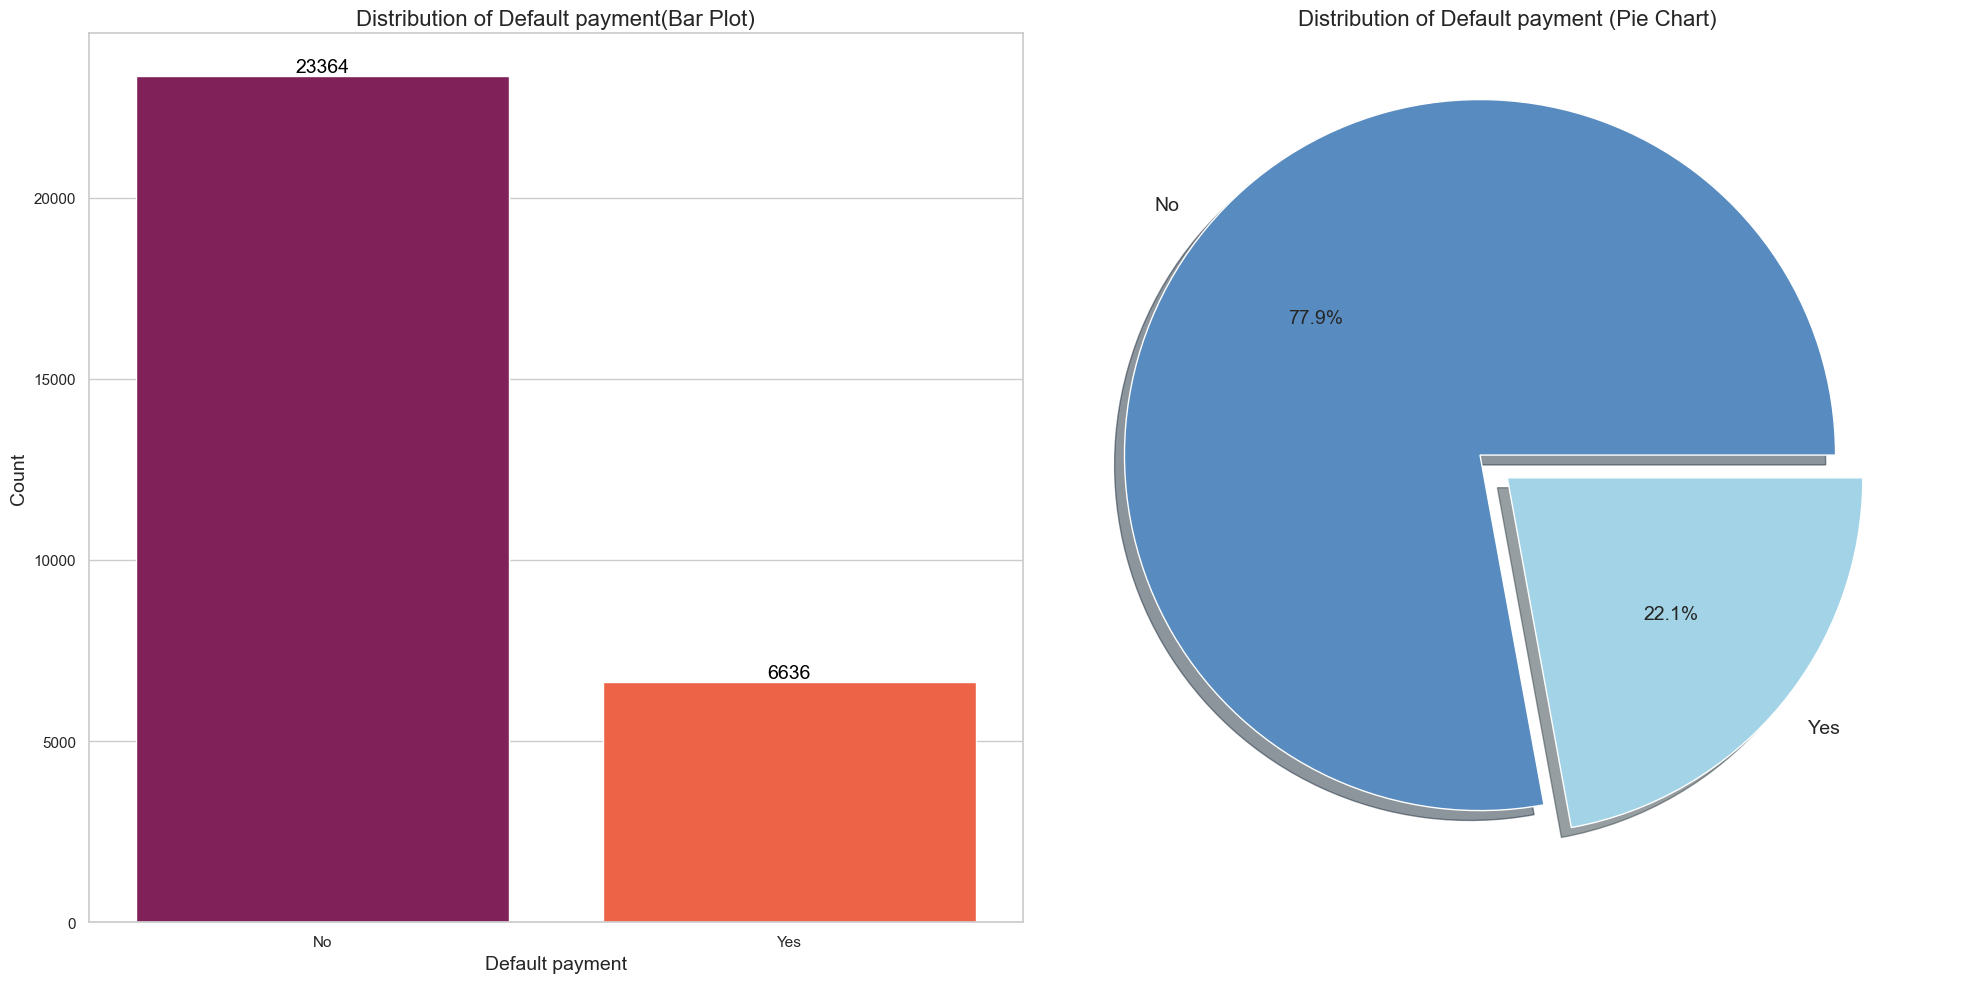

In [46]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Bar plot
sns.barplot(x=default_data.index, y=default_data.values, ax=ax[0], saturation=0.95, palette="rocket")
ax[0].set_title("Distribution of Default payment(Bar Plot)", fontsize=16)
ax[0].set_xlabel("Default payment", fontsize=14)
ax[0].set_ylabel("Count", fontsize=14)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

# Pie chart
#explode = [0.1] * len(edu_data)  # Dynamically setting explode for all slices
#colors = ['#ff4d4d', '#ff8000', '#ffd11a', '#80b3ff', '#99ff99']  # Enough colors for all slices
palette_color = sns.color_palette('RdYlBu_r')
ax[1].pie(
    x=default_data,
    labels=default_data.index,
    explode=[0.1,0],
    autopct='%1.1f%%',
    shadow=True,
    colors=palette_color,
    textprops={'fontsize': 14}
)
ax[1].set_title("Distribution of Default payment (Pie Chart)", fontsize=16)

# Show the plots
plt.tight_layout()
plt.show()

#### Insights

- From the above ploting we can see out of 30000 credit card holders 6636 (22.1 %) cardeit card holders have Default payments

### 6. Dropping data cloumns

In [47]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,BIN_LIMIT_BAL,bin_age
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,10000-60000,"(20, 25]"
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,110000-160000,"(25, 30]"
2,90000.0,2,2,2,34,0,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,60000-110000,"(30, 35]"
3,50000.0,2,2,1,37,0,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,10000-60000,"(35, 40]"
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,10000-60000,"(50, 60]"


In [48]:
df.drop(['BIN_LIMIT_BAL','bin_age'],axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Insights

- 'BIN_LIMIT_BAL', 'bin_age' columns have added for understanding the plot they are not correlated with the target column (Default payment) and they have string values.

### 7. Cheching Outliers

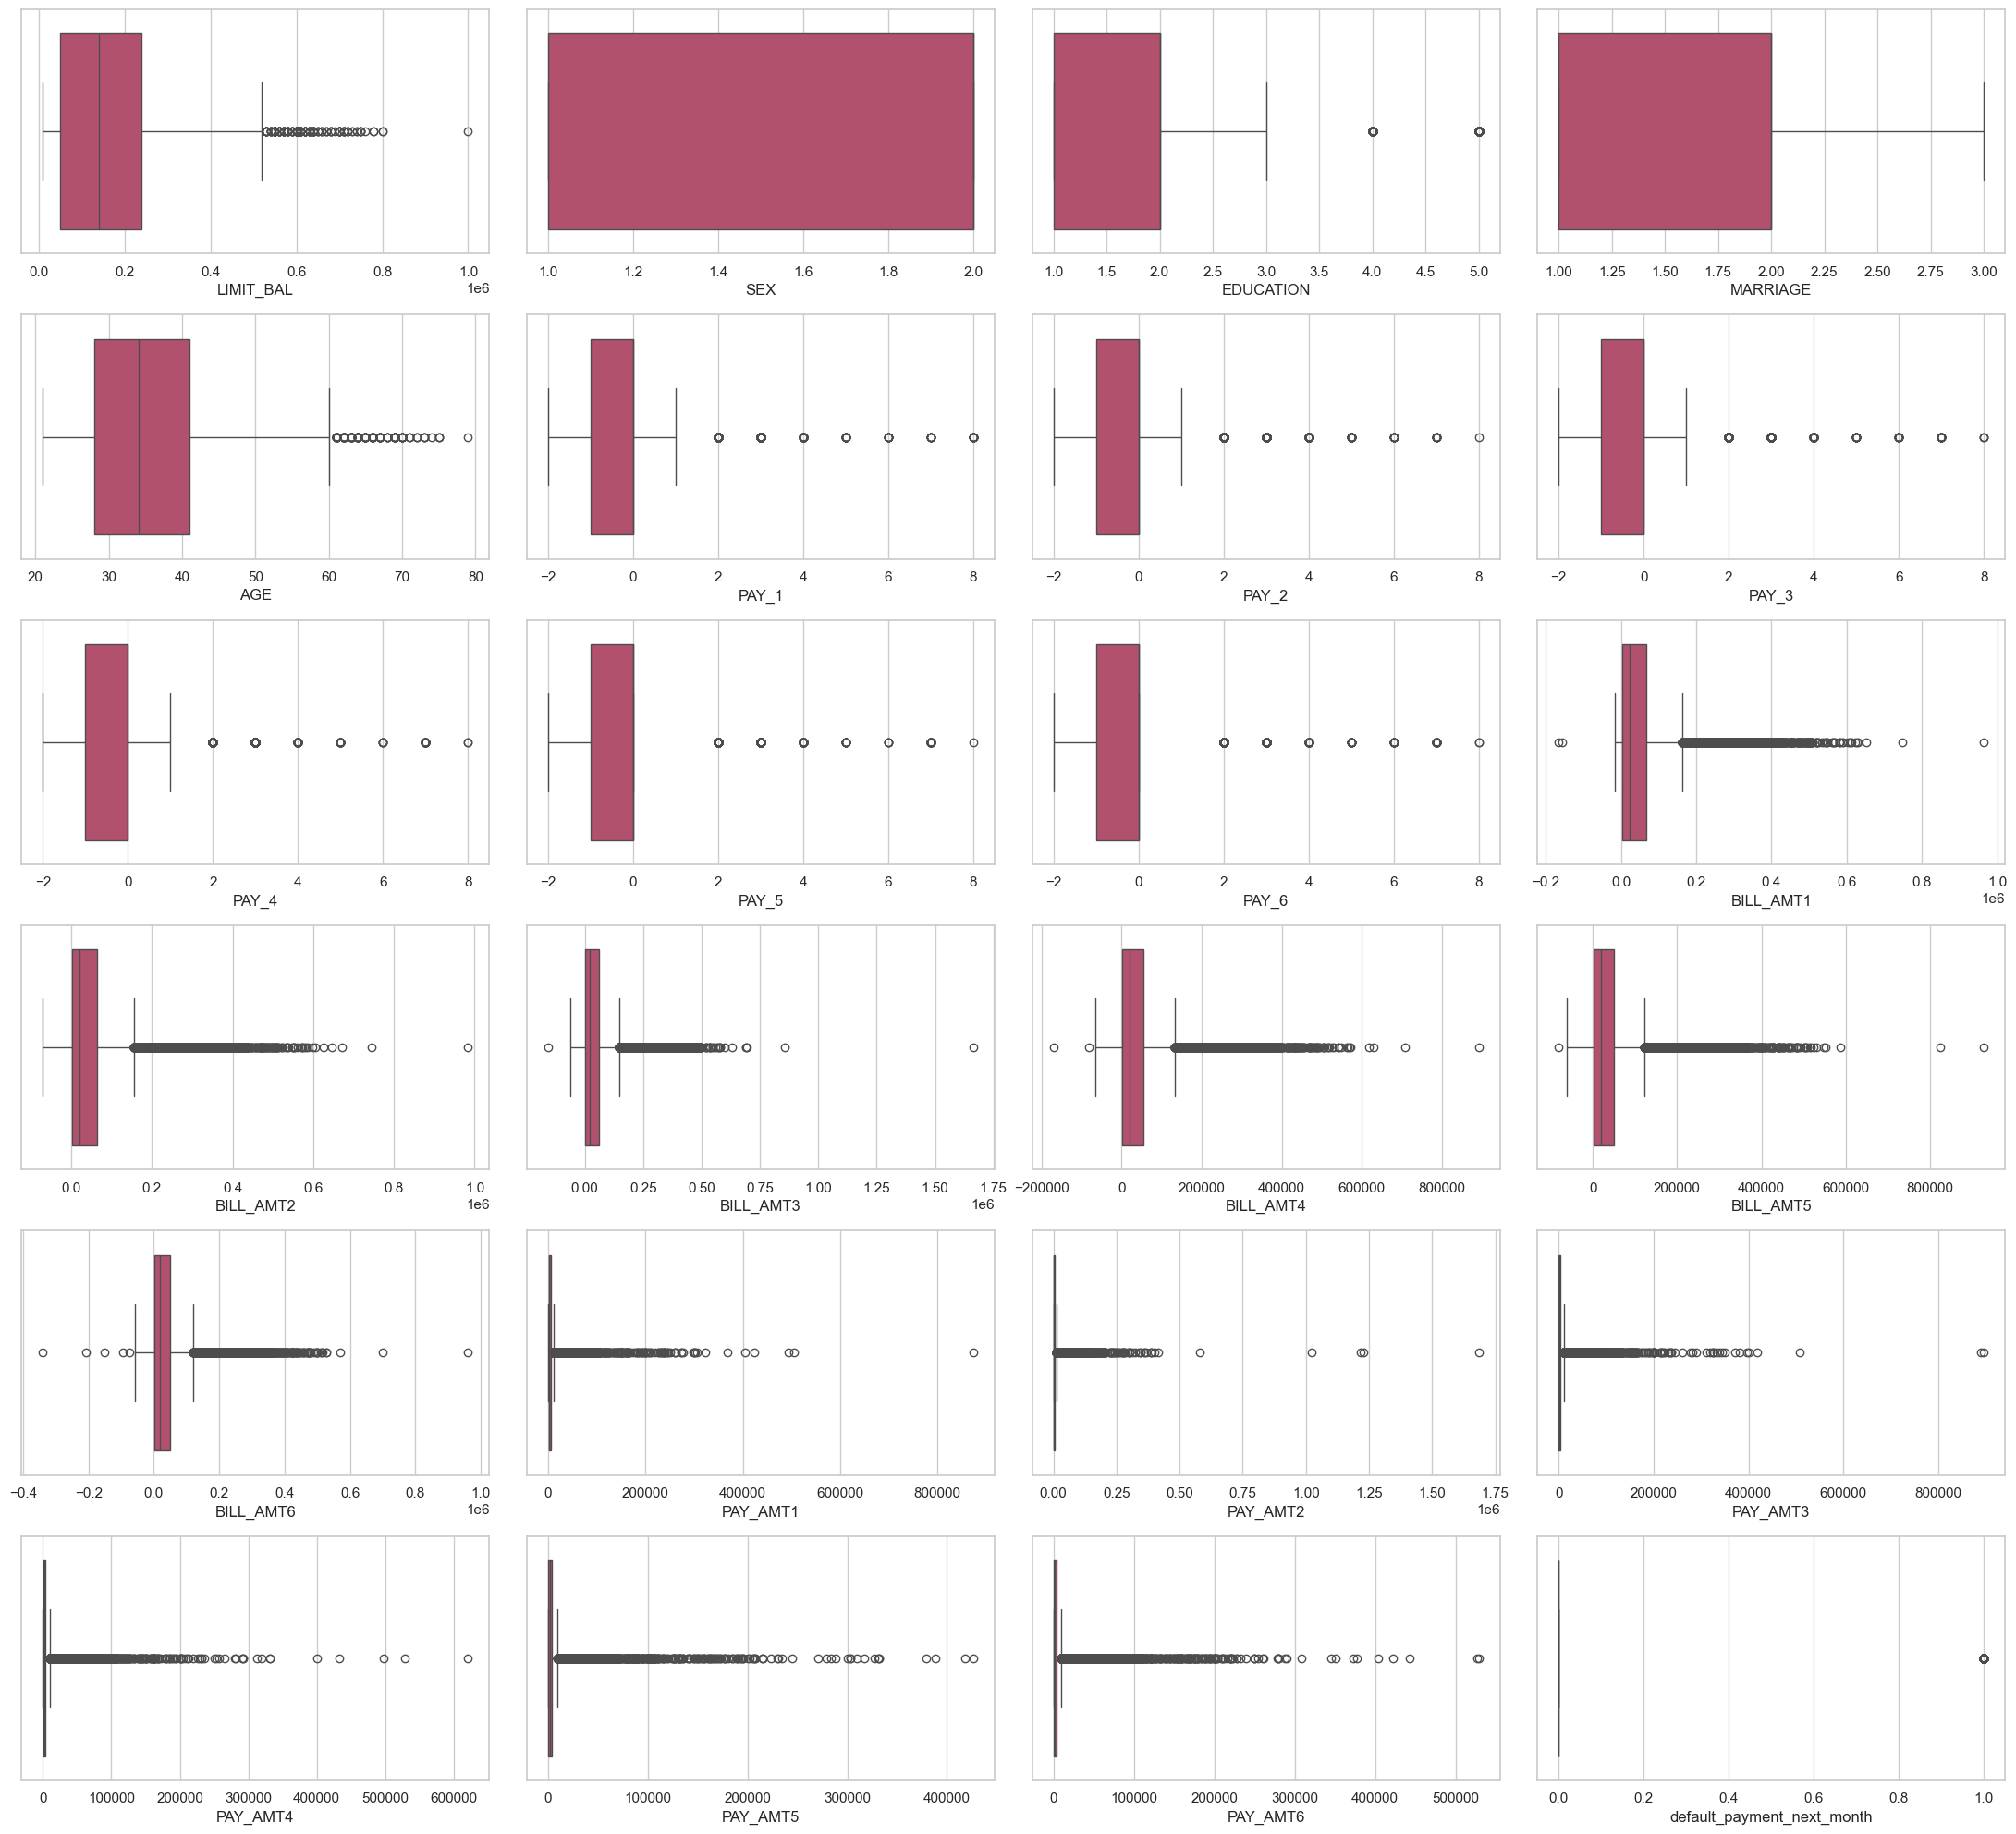

In [49]:
plt.subplots(6, 4, figsize=(22, 20))

# Enumerate to get both the index and column name
for index, column_name in enumerate(df.columns, 1):
  plt.subplot(6, 4, index)  # Use index as subplot number
  sns.boxplot(x=df[column_name],palette='flare')  # Use column_name to access data
plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

### 8. Multicolinearity

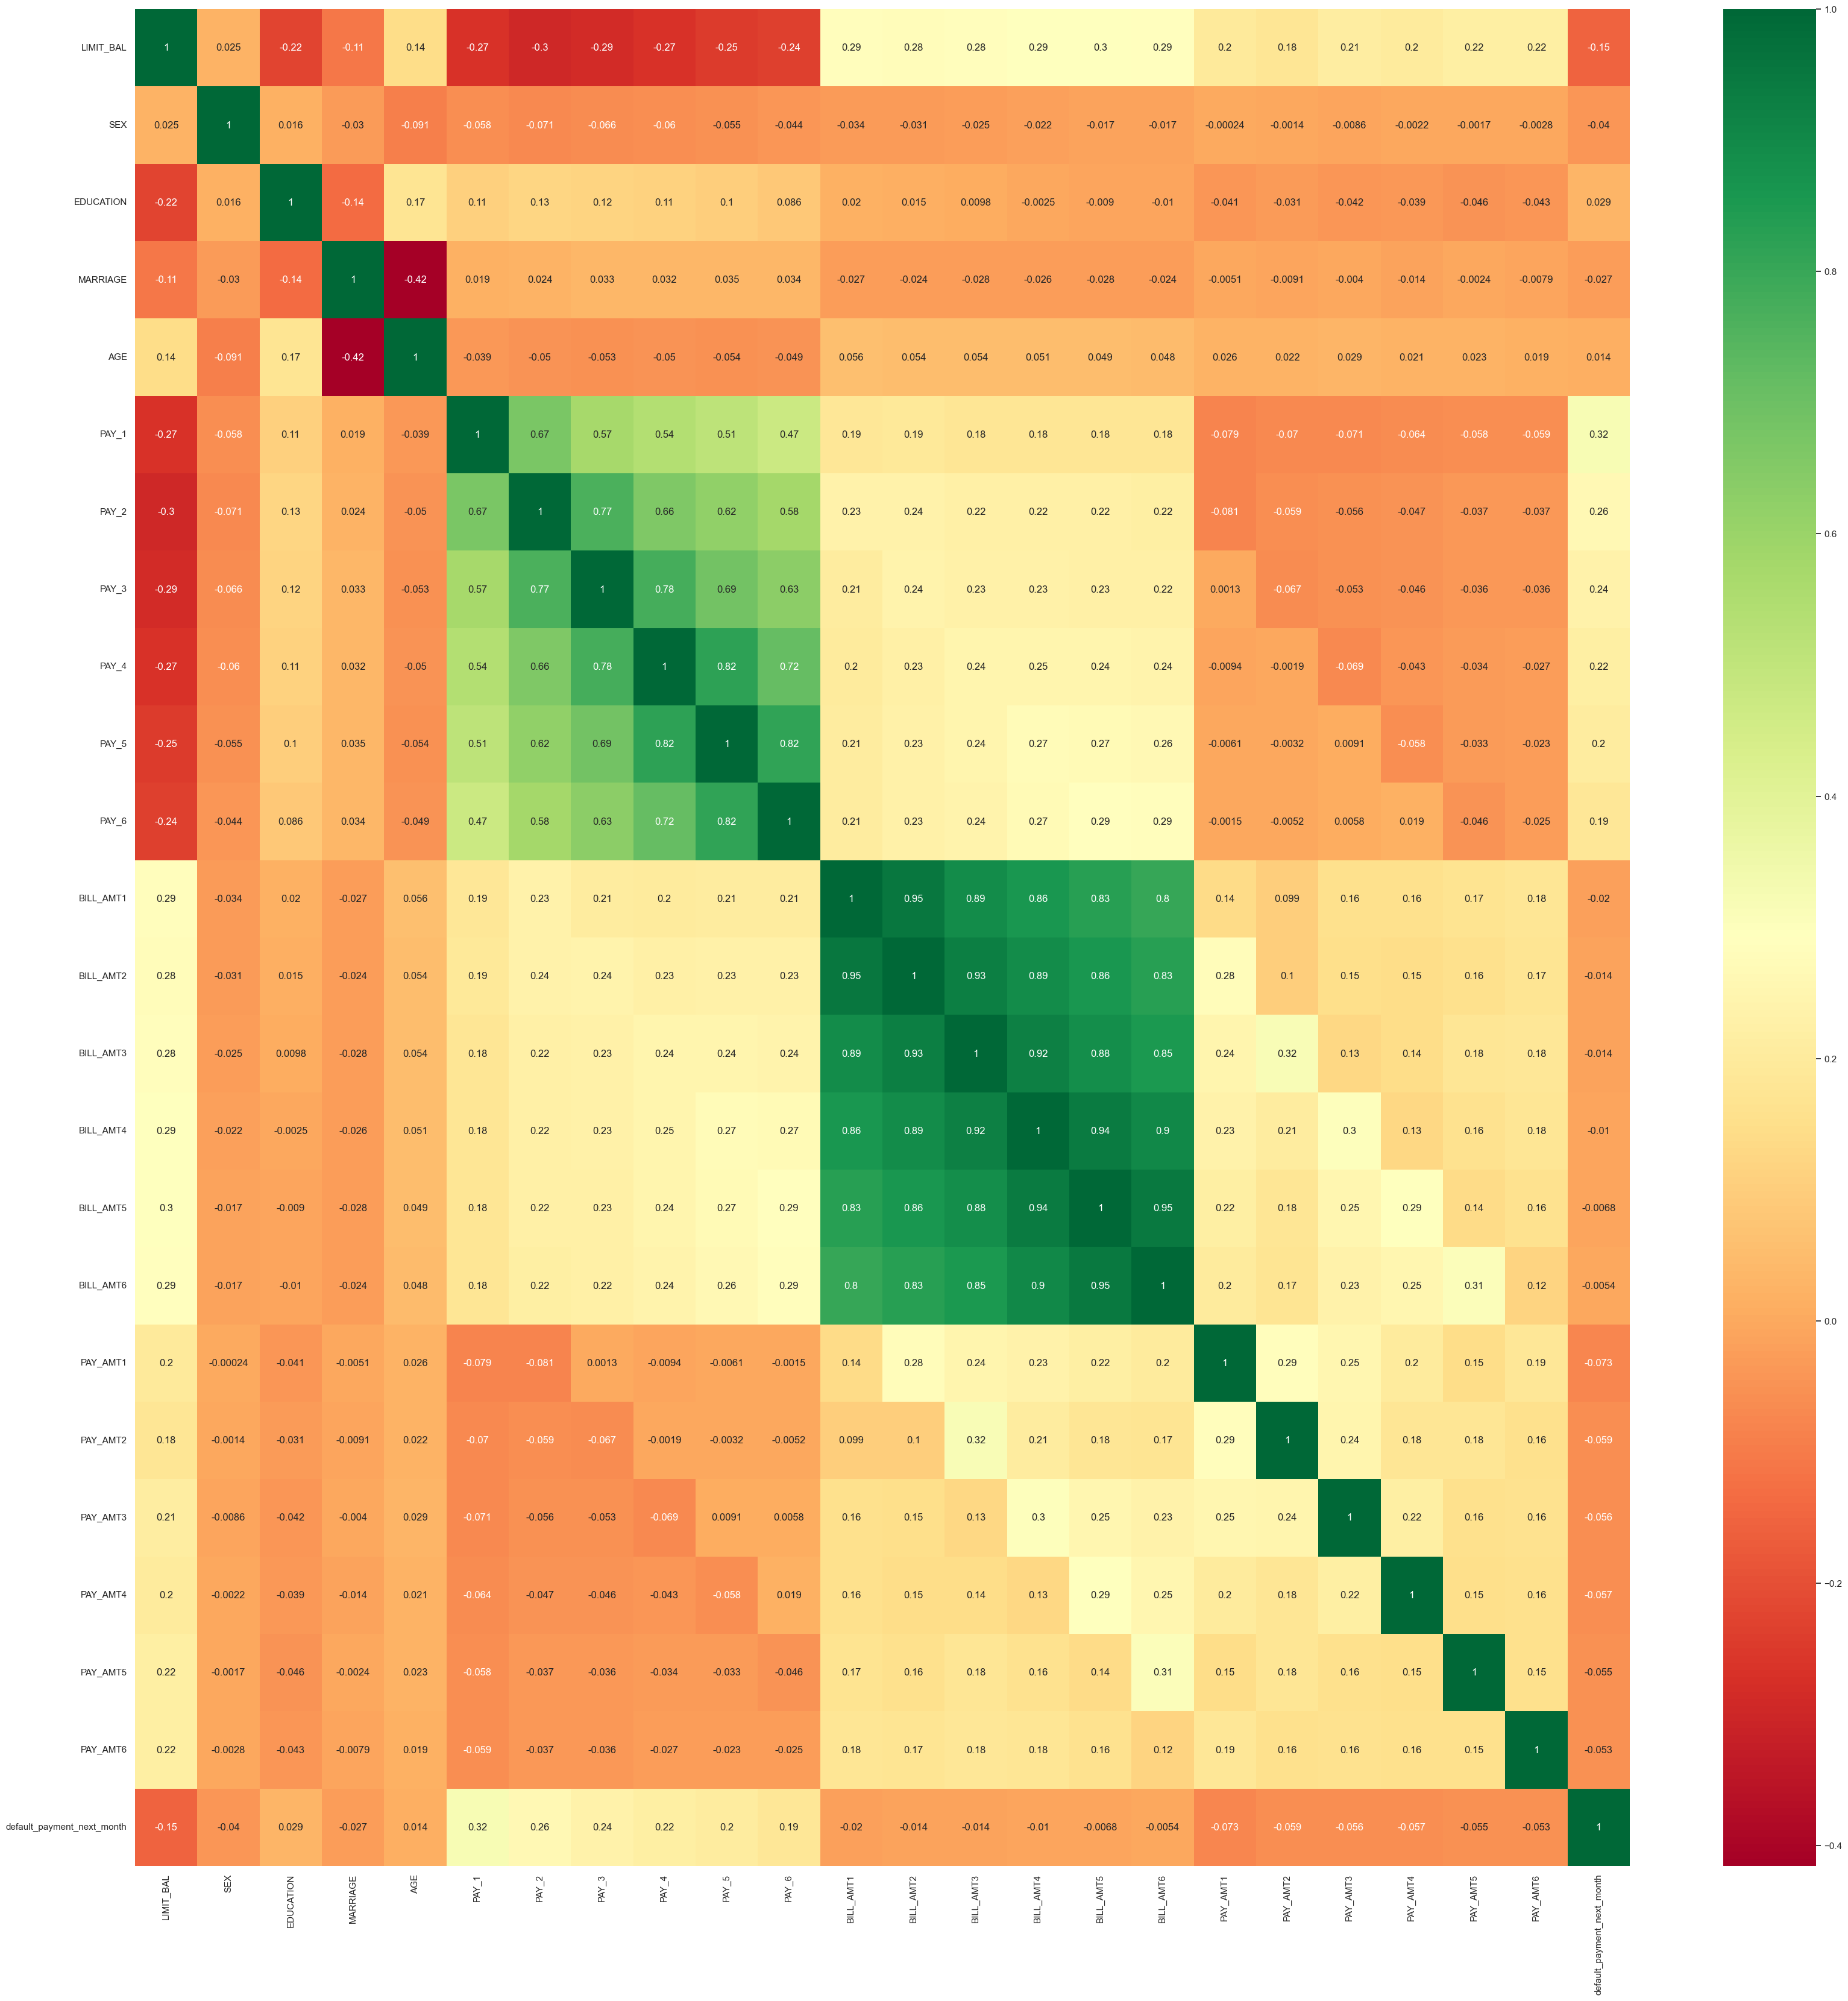

In [50]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
plt.show()

#### Conclusion -
- From the correlation heatmap above, it can be seen that there are some relationships between the feature columns, they are not entirely independent.

- Limit_bal and pay_1 has positive correlation and Education , Repayment status has positive correlation with default_payment_next_month

- We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation.